# About the data
__Covid-19 data set__\
__Data obtained from Mexican government data set__\
__[the data link](https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset)__

# The objective
1. __the current COVID-9 pandemic provides us with an opportunity to ponder and reflect over what we can better in the way we deal with healthcare to make us humans be more prepared and enabled to combat such an event in the future.__\
2. __getting insights which help the Medical kits__ 

__Get the first Intuition__

In [1]:
# import the necessary modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, f1_score,classification_report

In [2]:
df = pd.read_csv("E:\sic project\covid.csv")

In [3]:
df.head(3)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [5]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

__about the columns__
1. id:The identification number of the patient
2. sex: Identify gender of the patient, 1 as female and 2 as male.
3. patient_type: Type of patient, 1 for not hospitalized and 2 for hosptalized.
4. entry_date: The date that the patient went to the hospital.
5. date_symptoms: The date that the patient started to show symptoms.
6. date_died: The date that the patient died, “9999-99-99” stands for not specified
7. intubed: Intubation is a procedure that’s used when you can’t breathe on your own. Your doctor puts a tube down your throat and into your windpipe to make it easier to get air into and out of your lungs. A machine called a ventilator pumps in air with extra oxygen. Then it helps you breathe out air that’s full of carbon dioxide (CO2). “1” denotes that the patient used ventilator and “2” denotes that the patient did not, “97” “98” “99” means not specified.
8. pneumonia: Indicates whether the patient already have air sacs inflammation or not “1” for yes, “2” for no, “97” “98” “99” means not specified.
9. age: Specifies the age of the patient.
10. pregnancy: Indicates whether the patient is pregnant or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
11. diabetes: Indicates whether the patient has diabetes or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
12. copd: Indicates whether the patient has Chronic obstructive pulmonary disease (COPD) or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
13. asthma: Indiactes whether the patient has asthma or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
14. inmsupr: Indicates whether the patient is immunosuppressed or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
15. hypertension: Indicates whether the patient has hypertension or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
16. other_disease: Indicates whether the patient has other disease or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
17. cardiovascular: Indicates whether if the patient has heart or blood vessels realted disease, “1” for yes, “2” for no, “97” “98” “99” means not specified.
18. obesity: Indicates whether the patient is obese or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
19. renal_chronic: Indicates whether the patient has chronic renal disease or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
20. tobacco: Indicates whether if the patient is a tobacco user, “1” for yes, “2” for no, “97” “98” “99” means not specified.
21. contact_other_covid: Indicates whether if the patient has contacted another covid19 patient.
22. icu: Indicates whether the if the patient had been admitted to an Intensive Care Unit (ICU), “1” for yes, “2” for no, “97” “98” “99” means not specified.
23. covid_res: 1 indicates person is covid +ve,2 indicates person is covide -ve,3 indicates result is in awaiting process

__Null Values and Duplicated__

In [6]:
df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [7]:
df.duplicated().sum()

0

# Data Wrangling

In [8]:
# un necessary column
df.drop('id',axis=1, inplace=True)
df.head(1)

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,...,2,2,2,2,2,2,2,2,1,97


In [9]:
# deal with un-specified values: which mean it's un-known for the gov
un_specified = {1: 'Yes', 2: 'No',97:'Not Specified', 98:'Not Specified',99:'Not Specified'}

In [10]:
df.intubed.replace(un_specified, inplace=True)
df.pneumonia.replace(un_specified, inplace=True)
df.pregnancy.replace(un_specified, inplace=True)
df.diabetes.replace(un_specified, inplace=True)
df.copd.replace(un_specified, inplace=True)
df.asthma.replace(un_specified, inplace=True)
df.inmsupr.replace(un_specified, inplace=True)
df.hypertension.replace(un_specified, inplace=True)
df.other_disease.replace(un_specified, inplace=True)
df.cardiovascular.replace(un_specified, inplace=True)
df.obesity.replace(un_specified, inplace=True)
df.renal_chronic.replace(un_specified, inplace=True)
df.tobacco.replace(un_specified, inplace=True)
df.contact_other_covid.replace(un_specified, inplace=True)
df.icu.replace(un_specified, inplace=True)

In [11]:
df.head(3)

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,04-05-2020,02-05-2020,9999-99-99,Not Specified,No,27,Not Specified,No,...,No,No,No,No,No,No,No,No,1,Not Specified
1,2,1,19-03-2020,17-03-2020,9999-99-99,Not Specified,No,24,Not Specified,No,...,No,No,No,No,No,No,No,Not Specified,1,Not Specified
2,1,2,06-04-2020,01-04-2020,9999-99-99,No,No,54,No,No,...,No,No,No,No,Yes,No,No,Not Specified,1,No


In [12]:
# de-code some columns
df.sex.replace({1: 'Female', 2: 'Male'}, inplace=True)
df.patient_type.replace({1: 'Outpatient', 2: 'Inpatient'}, inplace=True)
df.covid_res.replace({1: 'Positive', 2: 'Negative', 3:'Awaiting Results'}, inplace=True)

In [13]:
df.head(2)

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,Male,Outpatient,04-05-2020,02-05-2020,9999-99-99,Not Specified,No,27,Not Specified,No,...,No,No,No,No,No,No,No,No,Positive,Not Specified
1,Male,Outpatient,19-03-2020,17-03-2020,9999-99-99,Not Specified,No,24,Not Specified,No,...,No,No,No,No,No,No,No,Not Specified,Positive,Not Specified


In [14]:
# deal with date-type
date_fields = ['entry_date','date_symptoms']
for dates in date_fields:
    df[dates] = pd.to_datetime(df[dates], infer_datetime_format=True)   # convert to date type

In [15]:
# un-Specified dates
df['date_died'].replace('9999-99-99','Not Specified',inplace=True)

In [16]:
df.head(3)

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,Male,Outpatient,2020-04-05,2020-02-05,Not Specified,Not Specified,No,27,Not Specified,No,...,No,No,No,No,No,No,No,No,Positive,Not Specified
1,Male,Outpatient,2020-03-19,2020-03-17,Not Specified,Not Specified,No,24,Not Specified,No,...,No,No,No,No,No,No,No,Not Specified,Positive,Not Specified
2,Female,Inpatient,2020-06-04,2020-01-04,Not Specified,No,No,54,No,No,...,No,No,No,No,Yes,No,No,Not Specified,Positive,No


## EDA >> Let's EXPLORE this data :D

__Value-Counts__

In [17]:
columns = df.columns

In [18]:
def value_counts(columns):
    for column in columns:
        if len(df[column].value_counts()) >= 5:  # the pie chart isn't sutable
            continue
        else:
            df[column].value_counts().plot(kind='pie', autopct= '%1.1f%%',figsize = (10,8),fontsize=12)
            plt.title(f"The ratio between vlaues for the {column} column",fontsize=15)
            plt.show()

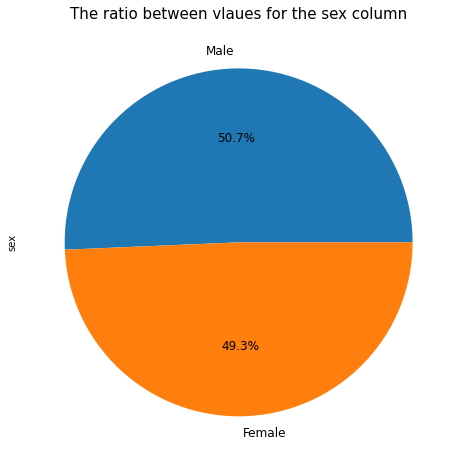

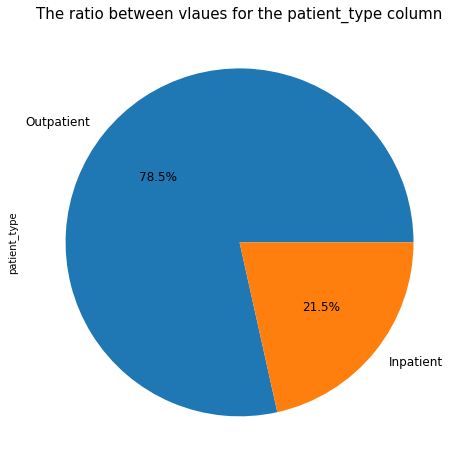

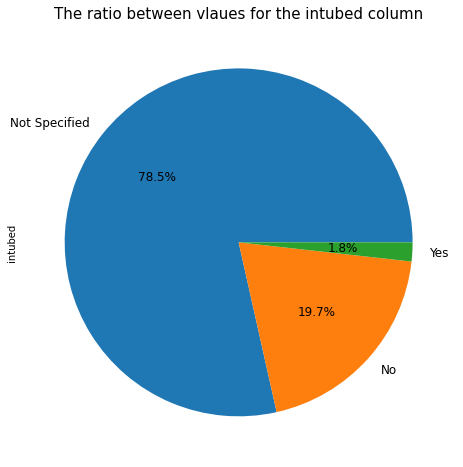

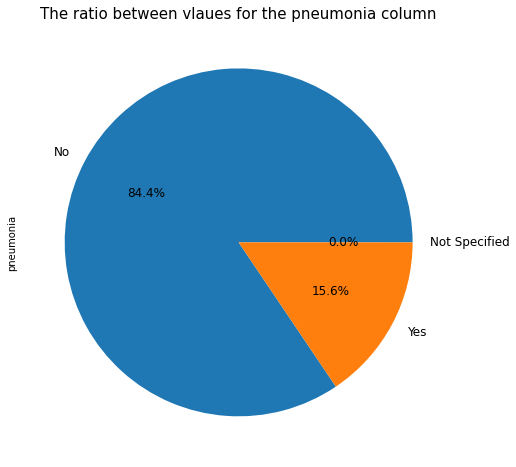

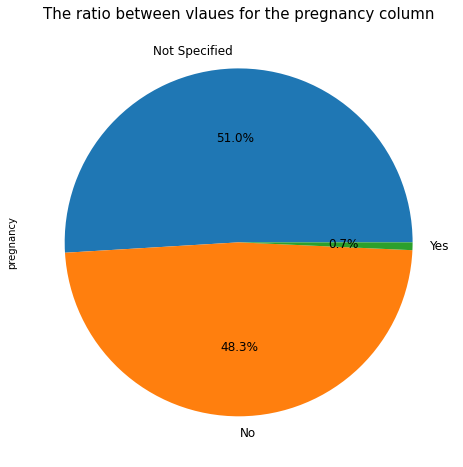

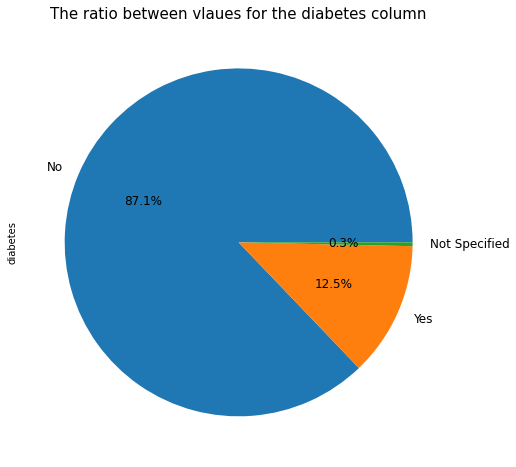

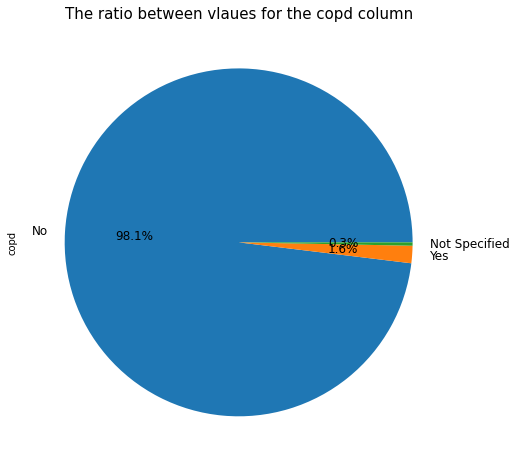

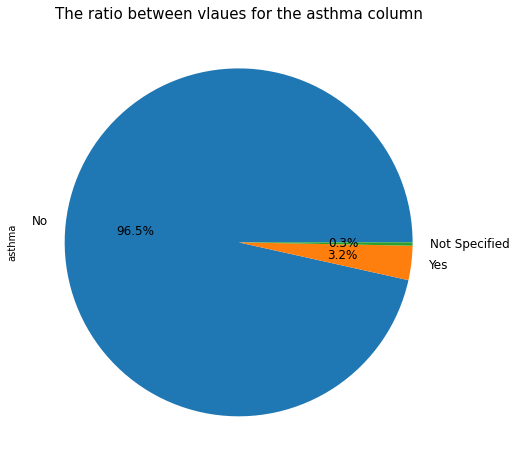

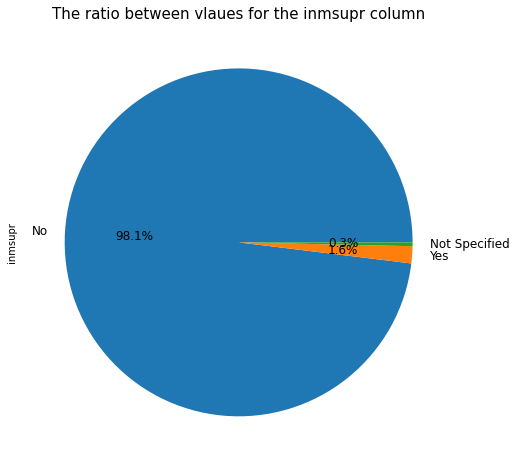

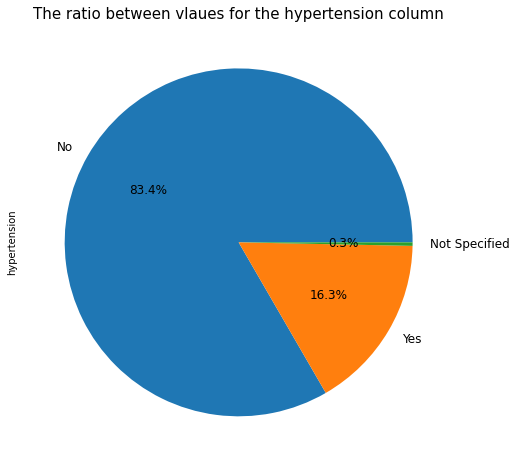

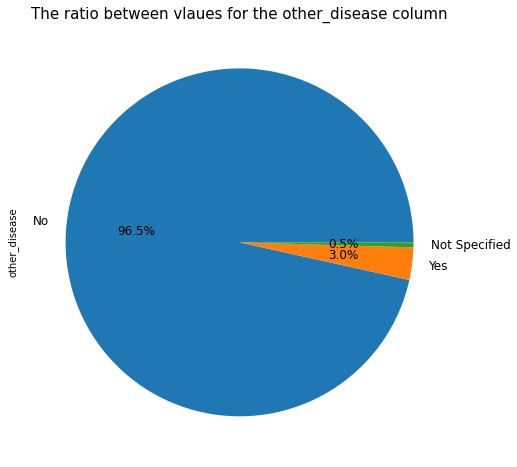

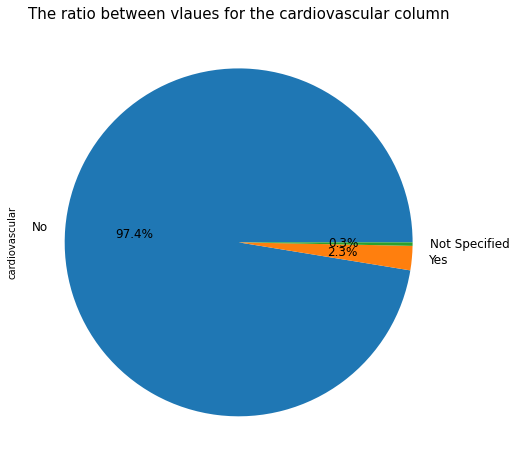

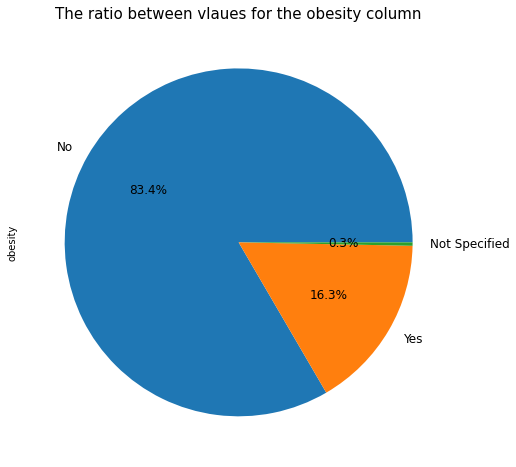

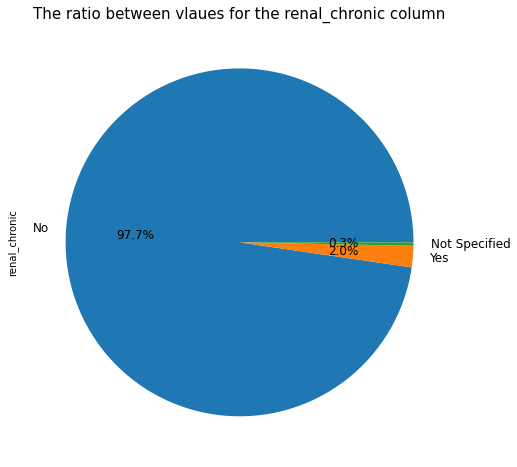

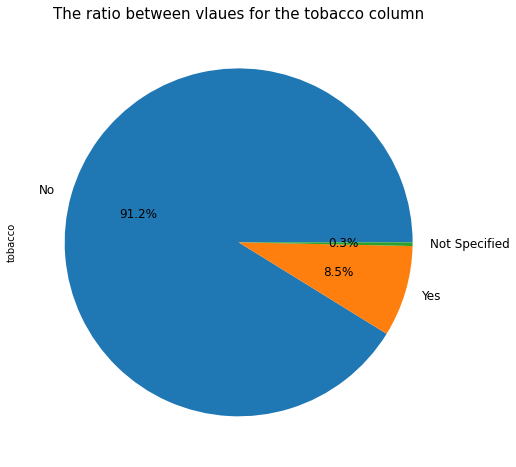

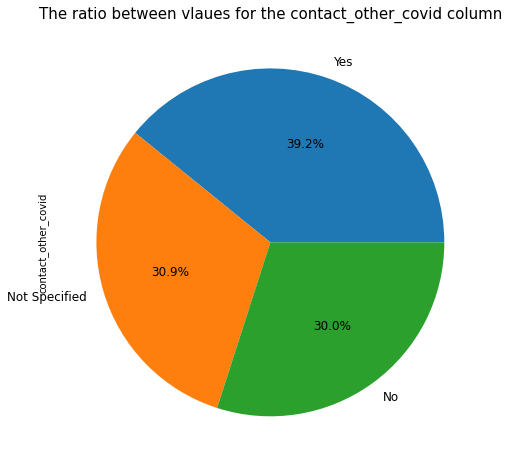

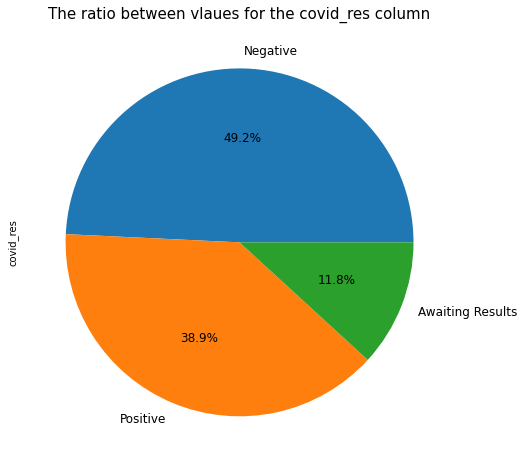

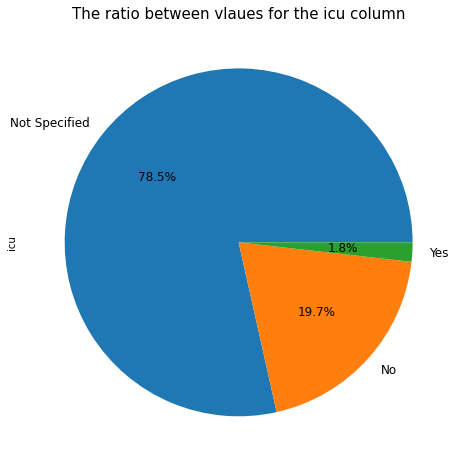

In [19]:
value_counts(columns)

### As we saw from the first graph the ratio of Gender distribution is nearly equal and this  is very great as there is no bias in the data

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender distribution')

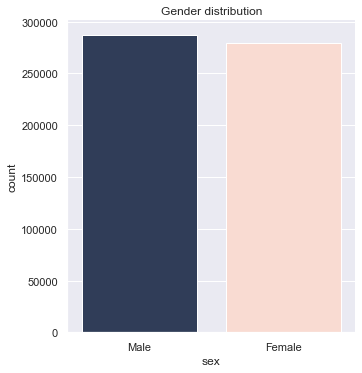

In [330]:
sns.catplot('sex',data=df,kind='count',palette=["#293B5F","#FFD8CC"])
plt.title('Gender distribution')

__ another Conclusions:__
1. most of the patients is not hospitalized
2. most of the patients didn't got pneumonia
3. most of the womens isn't pregenant
4. most of the patients get diapets
5. most of the patients smokes
6. the ratio of people who got negative result is half if the data set
7. the ratio of people who joined the ICUs is a little bit

__about the first conlusion:__ _Did the ratio between the gendar tests and deaths are the same is the same too?!_


In [20]:
# we need new column indicate the deaths

df['Deaths'] = np.nan

i = 0

for i in range(len(df)):
    if df['date_died'][i] != 'Not Specified':
        df['Deaths'][i] = 'Yes'

<ipython-input-20-40b06661396b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Deaths'][i] = 'Yes'
C:\Users\ahmed\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
df.Deaths.fillna('No',inplace=True)

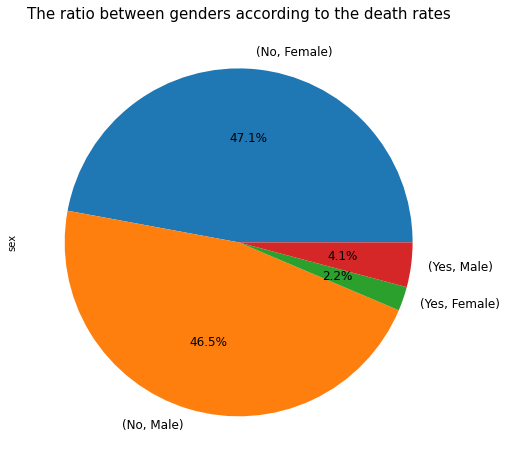

In [22]:
df.groupby(['Deaths','sex'])['sex'].count().plot(kind='pie', autopct= '%1.1f%%',figsize = (10,8),fontsize=12)
plt.title(f"The ratio between genders according to the death rates",fontsize=15)
plt.show()

__Conclusion:The ratio of people who dead of males is duobled the feamles__

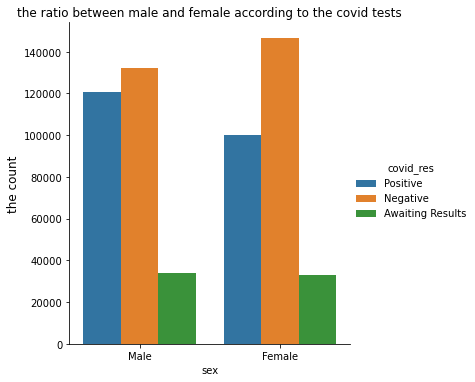

In [23]:
sns.catplot(data=df, kind="count", x="sex", hue="covid_res")
plt.ylabel("the count",fontsize=12)
plt.title("the ratio between male and female according to the covid tests")
plt.show()

__Conclusion: the most patiens who become positive are males, and the negative are females__

In [331]:
df_pos=df[df['covid_res']=='Positive']

df_pos.reset_index(drop=True,inplace=True)
df_pos['Fatal']=np.nan

i=0
for i in range(len(df_pos)):
    if df_pos['date_died'][i]!='Not Specified':
        df_pos['Fatal'][i]='Yes'

df_pos['Fatal']=df_pos['Fatal'].fillna('No')


<ipython-input-331-16a7c5990c95>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['Fatal']=np.nan
<ipython-input-331-16a7c5990c95>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['Fatal'][i]='Yes'
C:\Users\ahmed\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender wise COVID +ve results')

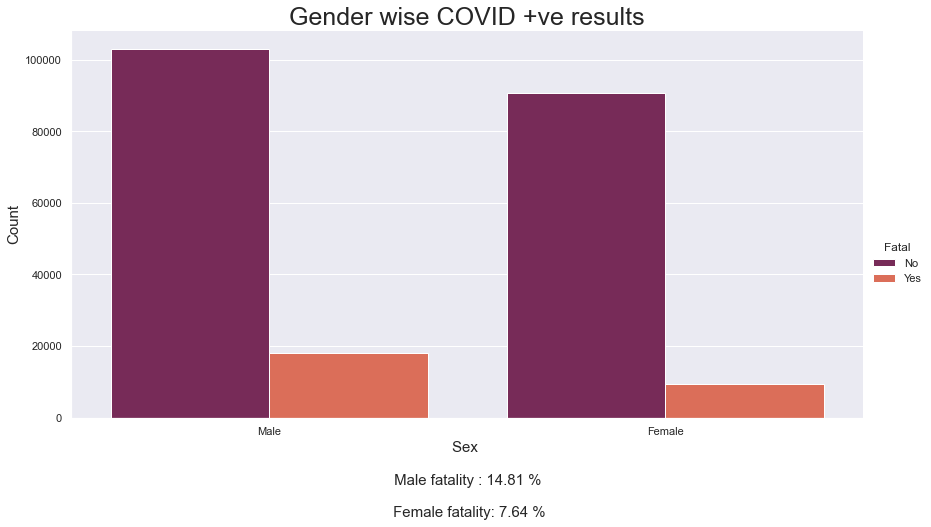

In [332]:
df_m_pos=df_pos[df_pos['sex']=='Male']
df_f_pos=df_pos[df_pos['sex']=='Female']


sns.catplot('sex',data=df_pos,hue='Fatal',kind='count',palette='rocket',aspect=2,height=6)
plt.xlabel('Sex \n \n Male fatality : {0:.2f} % \n \n Female fatality: {1:.2f} %'.format(100*df_m_pos['Fatal'].value_counts()[1]/df_m_pos.shape[0],100*df_f_pos['Fatal'].value_counts()[1]/df_m_pos.shape[0]),size=15)
plt.ylabel('Count',size=15)
plt.title('Gender wise COVID +ve results',size=25)

#### The death rate in infected males is almost double the rate of females

__Why men?__

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   sex                  566602 non-null  object        
 1   patient_type         566602 non-null  object        
 2   entry_date           566602 non-null  datetime64[ns]
 3   date_symptoms        566602 non-null  datetime64[ns]
 4   date_died            566602 non-null  object        
 5   intubed              566602 non-null  object        
 6   pneumonia            566602 non-null  object        
 7   age                  566602 non-null  int64         
 8   pregnancy            566602 non-null  object        
 9   diabetes             566602 non-null  object        
 10  copd                 566602 non-null  object        
 11  asthma               566602 non-null  object        
 12  inmsupr              566602 non-null  object        
 13  hypertension  

In [25]:
# to see the age
df.groupby('sex').mean()

,age
sex,
Female,42.002633
Male,43.225877


In [26]:
# to make sure there's no outliers
df.groupby('sex').median()

,age
sex,
Female,40
Male,42


__Isolate the diseases columns__

In [27]:
diseases_df = df.iloc[:,9:19 ]

In [28]:
diseases_df['pneumonia'] = df['pneumonia']
diseases_df['sex'] = df['sex']

In [29]:
diseases_df.head(1)

,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,pneumonia,sex
0,No,No,No,No,No,No,No,No,No,No,No,Male


In [30]:
columns = diseases_df.columns

In [31]:
def value_counts(columns):
    for column in columns:
        if column == 'sex':
            continue
        sns.catplot(data=diseases_df, kind="count", x='sex', hue=column)
        plt.ylabel("the count",fontsize=12)
        plt.title(f"The ratio between vlaues for the gender column according to the {column} column",fontsize=15)
        plt.show()
        print('\n\n')

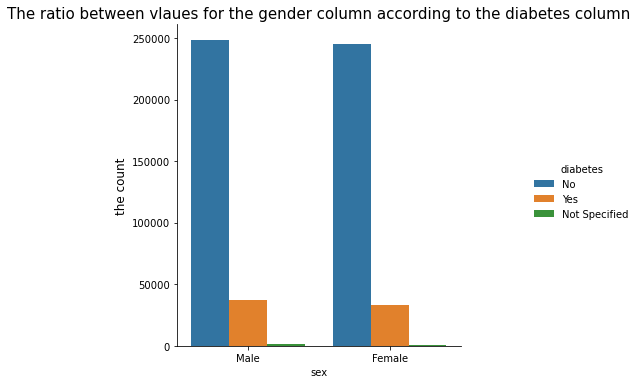

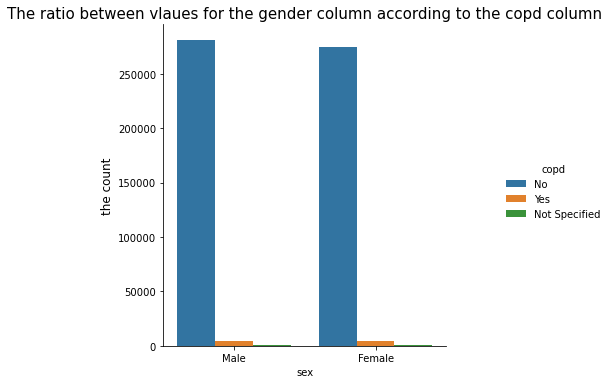

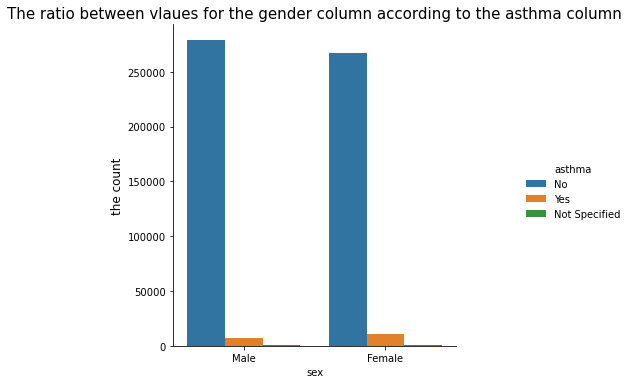

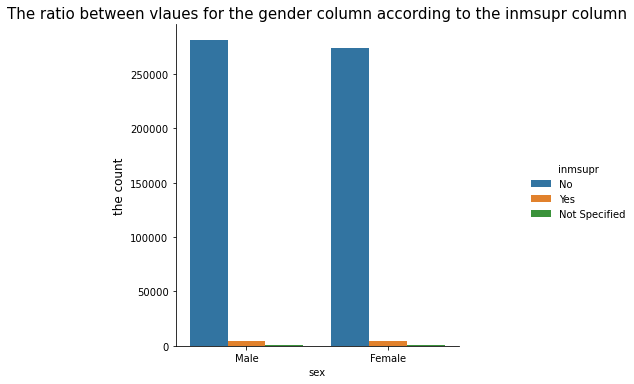

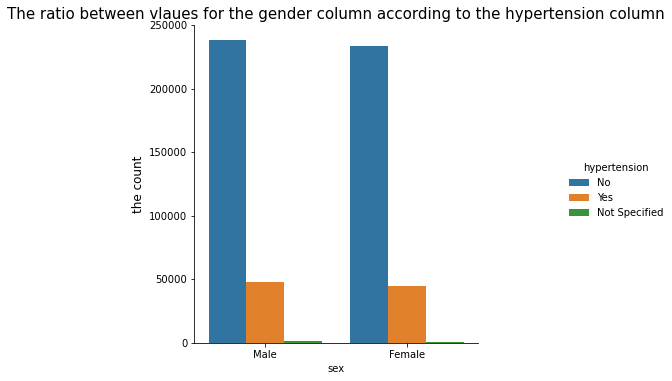

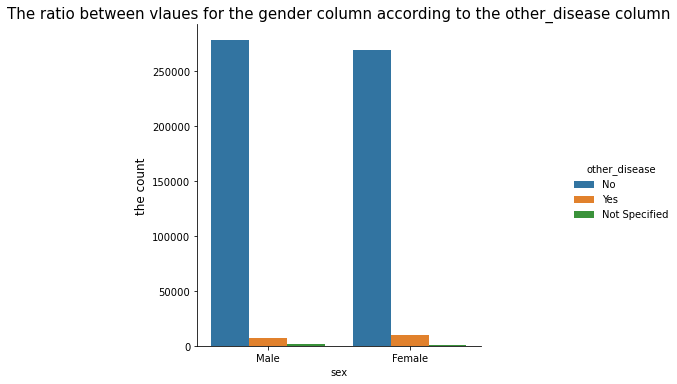

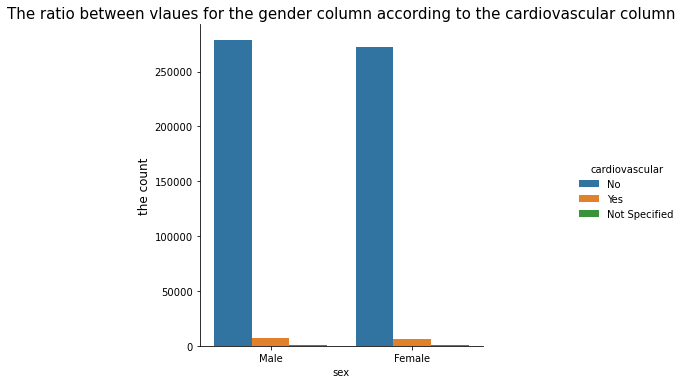

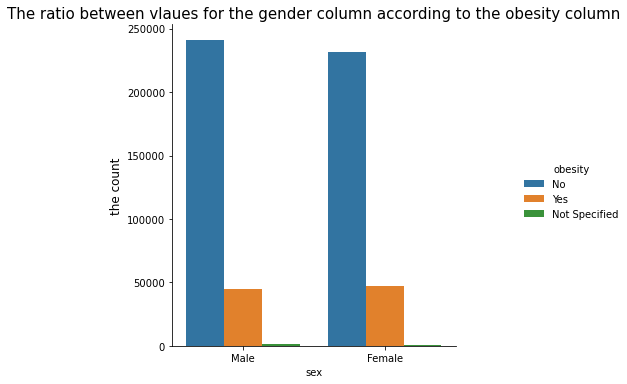

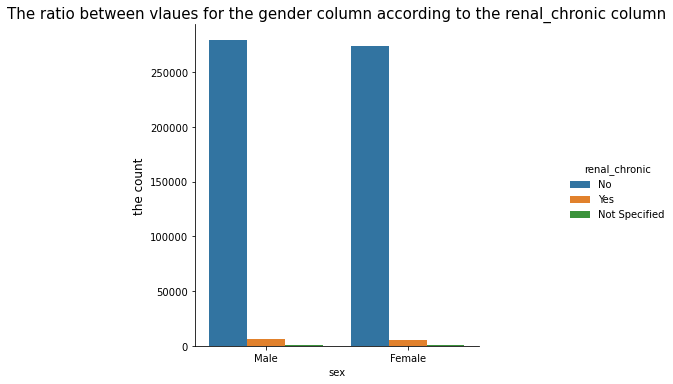

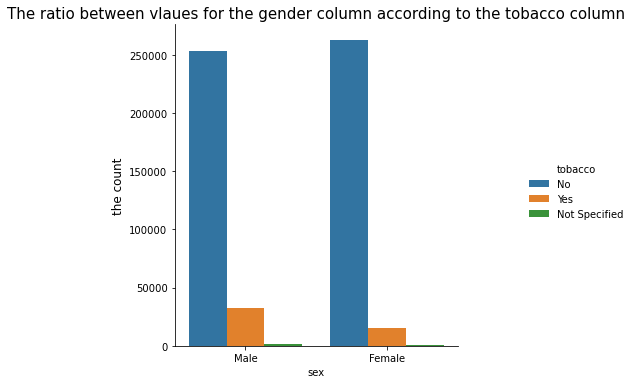

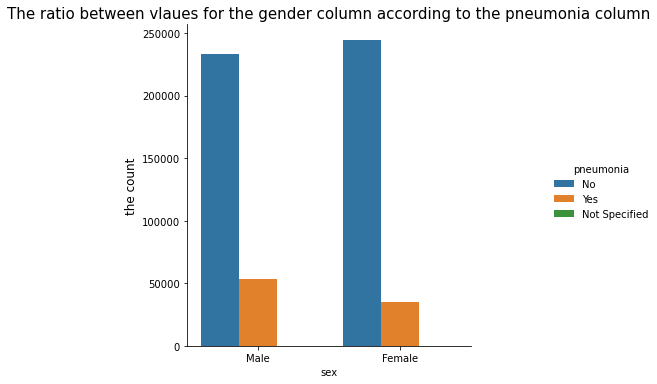

In [32]:
value_counts(columns)

__Conclusions: the big ratio of patients who got _pneumonia_ and _smoke_ are from males__

### About the pie plots second the Conslusions

__most of the patients is not hospitalized__

In [33]:
df.patient_type.value_counts()

Outpatient    444689
Inpatient     121913
Name: patient_type, dtype: int64

__The ratio of hospitals per thousands: _1.38___

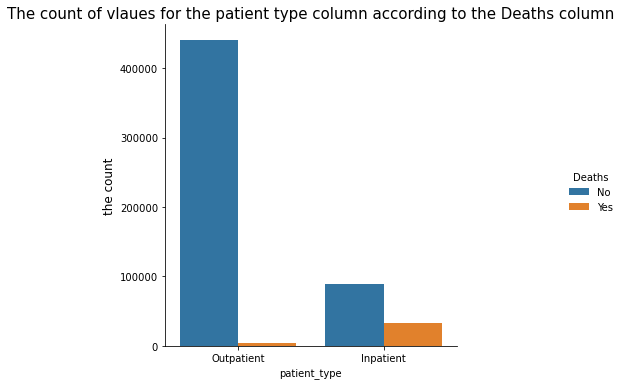

In [34]:
sns.catplot(data=df, kind="count", x='patient_type', hue='Deaths')
plt.ylabel("the count",fontsize=12)
plt.title(f"The count of vlaues for the patient type column according to the Deaths column",fontsize=15)
plt.show()

__Conclusion: Most of the people who leaves survive__\
__According to the ratio of hospitals per thousands: 1.38. So, Mexico gov gives the priority to the dangerous cases__

## what about intubations ?

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Reported intubations \n \n  Ratio=11')

<Figure size 720x576 with 0 Axes>

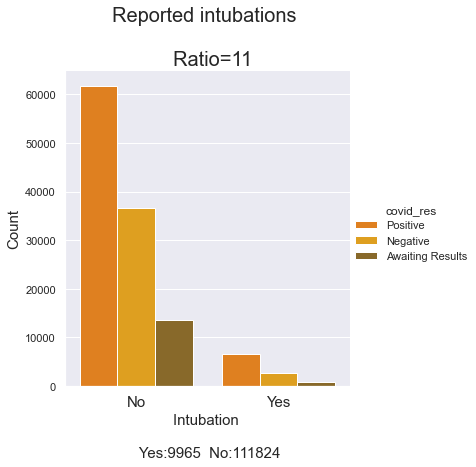

In [333]:
plt.figure(figsize=(10,8))
ax=sns.catplot('intubed',data=df[df['intubed']!="Not Specified"],kind='count',palette='autumn_d',hue='covid_res')
plt.xticks(size=15,)
plt.xlabel('Intubation \n \n Yes:{}  No:{}'.format(df['intubed'].value_counts()[2] , df['intubed'].value_counts()[1]),size=15)
plt.ylabel('Count',size=15)
plt.title('Reported intubations \n \n  Ratio={0:.0f}'.format(df['intubed'].value_counts()[1]/df['intubed'].value_counts()[2])
          ,size=20)

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 8.91312499999998, 'Results \n Test postivity rate: 65.72 %')

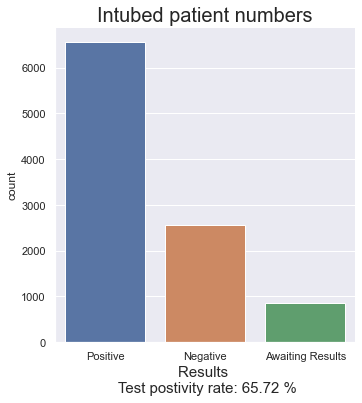

In [334]:
df_intubed=df[df['intubed']=='Yes']
sns.catplot('covid_res',data=df_intubed,kind='count')
plt.title('Intubed patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_intubed['covid_res'].value_counts()[0]/df_intubed['covid_res'].size),size=15)

### From the chart above, we can see that for intubated patients, about 65.72% of patients are COVID + VE. This basically tells us that intubation is a strong indicator of the indicator.

In [335]:
df_intubed.reset_index(drop=True,inplace=True)
df_intubed['Fatal']=np.nan

i=0
for i in range(len(df_intubed)):
    if df_intubed['date_died'][i]!='Not Specified':
        df_intubed['Fatal'][i]='Yes'

<ipython-input-335-845864a20538>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_intubed['Fatal']=np.nan
<ipython-input-335-845864a20538>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_intubed['Fatal'][i]='Yes'
C:\Users\ahmed\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, 

In [336]:
df_intubed['Fatal'].fillna('No',inplace=True)

C:\Users\ahmed\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [337]:
df_int_pos=df_intubed[df_intubed['covid_res']=='Positive']

In [338]:
df_intubed['Fatal'].value_counts()

Yes    5788
No     4177
Name: Fatal, dtype: int64

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'Positive'),
  Text(1, 0, 'Negative'),
  Text(2, 0, 'Awaiting Results')])

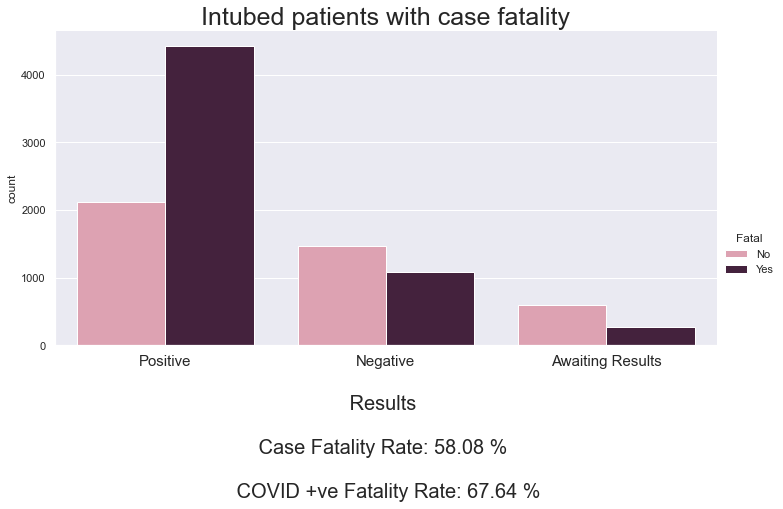

In [339]:
sns.catplot('covid_res',kind='count',hue='Fatal',data=df_intubed,palette=["#E798AE","#4A1C40"],height=5,aspect=2)
plt.title('Intubed patients with case fatality',size=25)

plt.xlabel('\n Results  \n \n Case Fatality Rate: {0:.2f} %  \n \n COVID +ve Fatality Rate: {1:.2f} %'.format(100* df_intubed['Fatal'].value_counts()[0]/df_intubed.shape[0],100 * df_int_pos['Fatal'].value_counts()[0]/df_int_pos.shape[0]),size=20)
plt.xticks(size=15)

# What about the Diseases

In [35]:
df_positive = df[df.covid_res == 'Positive']

In [36]:
df_positive.head(2)

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Deaths
0,Male,Outpatient,2020-04-05,2020-02-05,Not Specified,Not Specified,No,27,Not Specified,No,...,No,No,No,No,No,No,No,Positive,Not Specified,No
1,Male,Outpatient,2020-03-19,2020-03-17,Not Specified,Not Specified,No,24,Not Specified,No,...,No,No,No,No,No,No,Not Specified,Positive,Not Specified,No


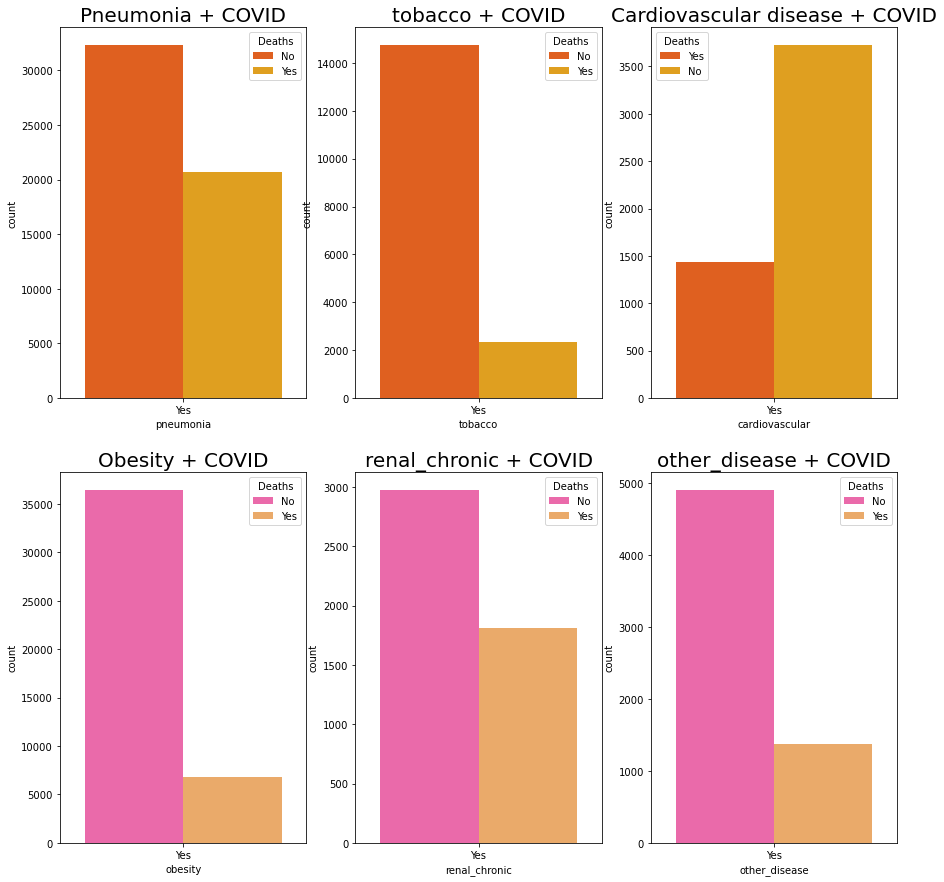

In [37]:
fig2 = plt.figure(figsize=(15,15))
ax1 = fig2.add_subplot(2,3,1)
ax2 = fig2.add_subplot(2,3,2)
ax3 = fig2.add_subplot(2,3,3)
ax4 = fig2.add_subplot(2,3,4)
ax5 = fig2.add_subplot(2,3,5)
ax6 = fig2.add_subplot(2,3,6)

df_pneu = df_positive[df_positive['pneumonia']=='Yes']
df_tobacco = df_positive[df_positive['tobacco']=='Yes']
df_card = df_positive[df_positive['cardiovascular']=='Yes']
df_obes = df_positive[df_positive['obesity']=='Yes']
df_renal_chronic = df_positive[df_positive.renal_chronic == 'Yes']
df_other = df_positive[df_positive.other_disease == 'Yes']

sns.countplot(x= 'pneumonia',data=df_pneu,hue='Deaths',ax=ax1,palette='autumn')
sns.countplot(x= 'tobacco',data=df_tobacco,hue='Deaths',ax=ax2,palette='autumn')
sns.countplot(x= 'cardiovascular',data=df_card,hue='Deaths',ax=ax3,palette='autumn')
sns.countplot(x= 'obesity', data=df_obes,hue='Deaths',ax=ax4,palette='spring')
sns.countplot(x= 'renal_chronic',data=df_renal_chronic,hue='Deaths',ax=ax5,palette='spring')
sns.countplot(x= 'other_disease',data=df_other,hue='Deaths',ax=ax6,palette='spring')

ax1.set_title('Pneumonia + COVID',size=20)
ax2.set_title('tobacco + COVID',size=20)
ax3.set_title('Cardiovascular disease + COVID',size=20)
ax4.set_title('Obesity + COVID',size=20)
ax5.set_title('renal_chronic + COVID',size=20)
ax6.set_title('other_disease + COVID',size=20)

plt.show()

__ALL of the above diseases are the most common columns which affect our cases__

### What About the age?

In [38]:
# to group our age
def age_band(age):
    
    if age<2:
        return 'Less than 2'
    elif (age>1) and (age<11):
        return '2-10'
    elif (age>10 and age<21):
        return '10-20'
    elif (age>20 and age<31):
        return '20-30'
    elif (age>30 and age<41):
        return '30-40'
    elif (age>40 and age<51):
        return '40-50'
    elif (age>50 and age<61):
        return '50-60'
    elif (age>60 and age<81):
        return '60-80'
    else:
        return 'Above 80'

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


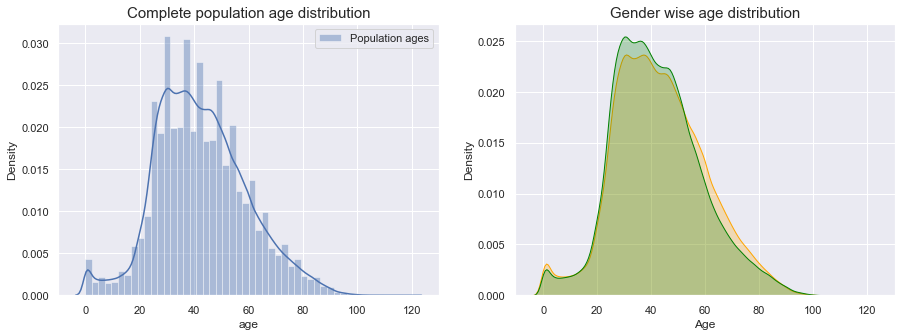

In [39]:
sns.set()
fig1=plt.figure(figsize=(15,5))
ax1=fig1.add_subplot(121)
a=sns.distplot(df['age'],ax=ax1,label='Population ages')
ax1.legend()
ax1.set_title('Complete population age distribution',size=15)
ax2=fig1.add_subplot(122)
df_m=df[df['sex']=='Male']
df_f=df[df['sex']=='Female']

b=sns.kdeplot(df_m['age'],shade=True,ax=ax2,label='Male age distribution',color='orange')
c=sns.kdeplot(df_f['age'],ax=ax2,label='Female age distribution',color='green',shade=True)
ax2.set_xlabel('Age')
ax2.set_title('Gender wise age distribution',size=15)

plt.show()

__Conclusion: high distribution from 20-60 years__

In [40]:
df['Age band'] = df['age'].apply(age_band)
df['Count'] = 1

In [41]:
df_age_band=df.groupby('Age band')['Count'].count().reset_index().sort_values(by='Count',ascending=False)

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


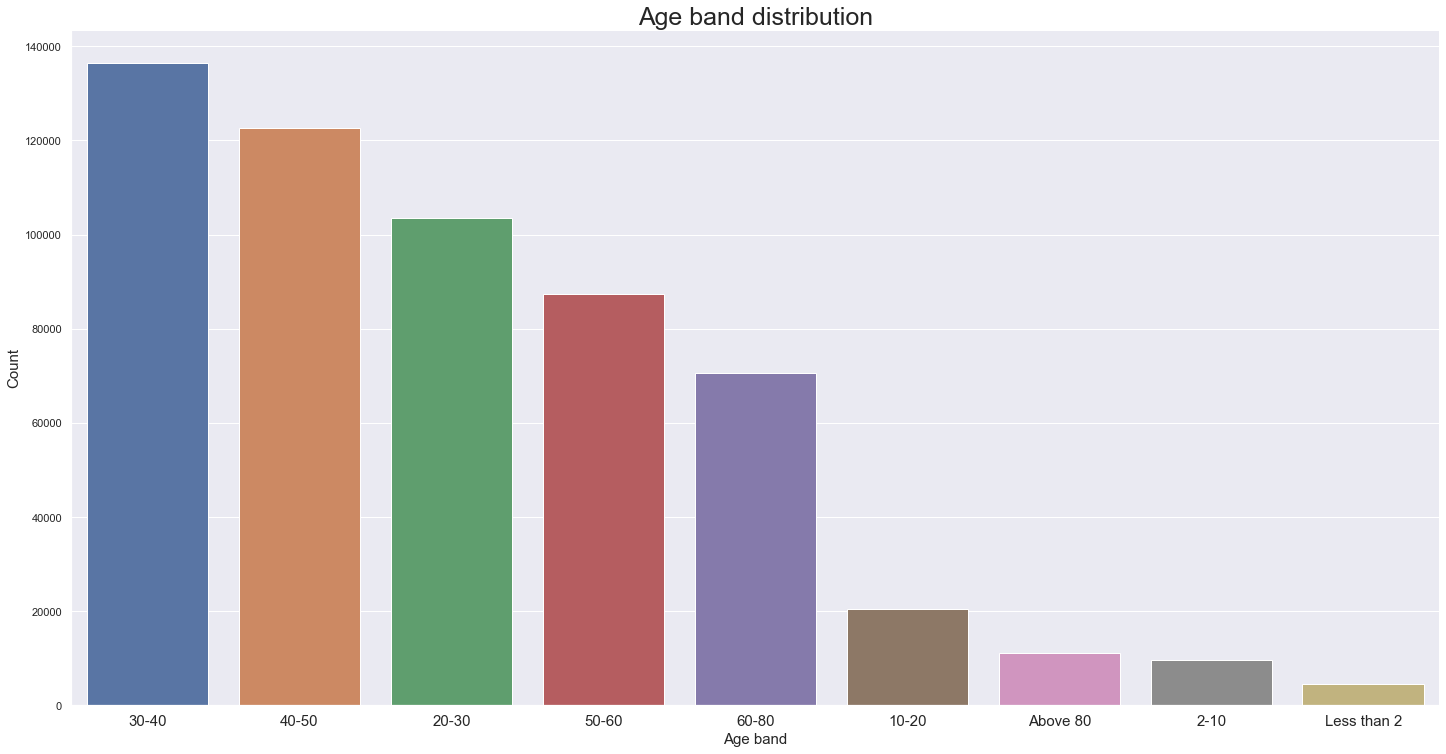

In [42]:
sns.catplot('Age band','Count', data=df_age_band,kind='bar',height=10,aspect=2)


plt.title('Age band distribution',size=25)
plt.xlabel('Age band',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=15)

plt.show()

__Conclusion: most of the cases's age is between 30 and 40__

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


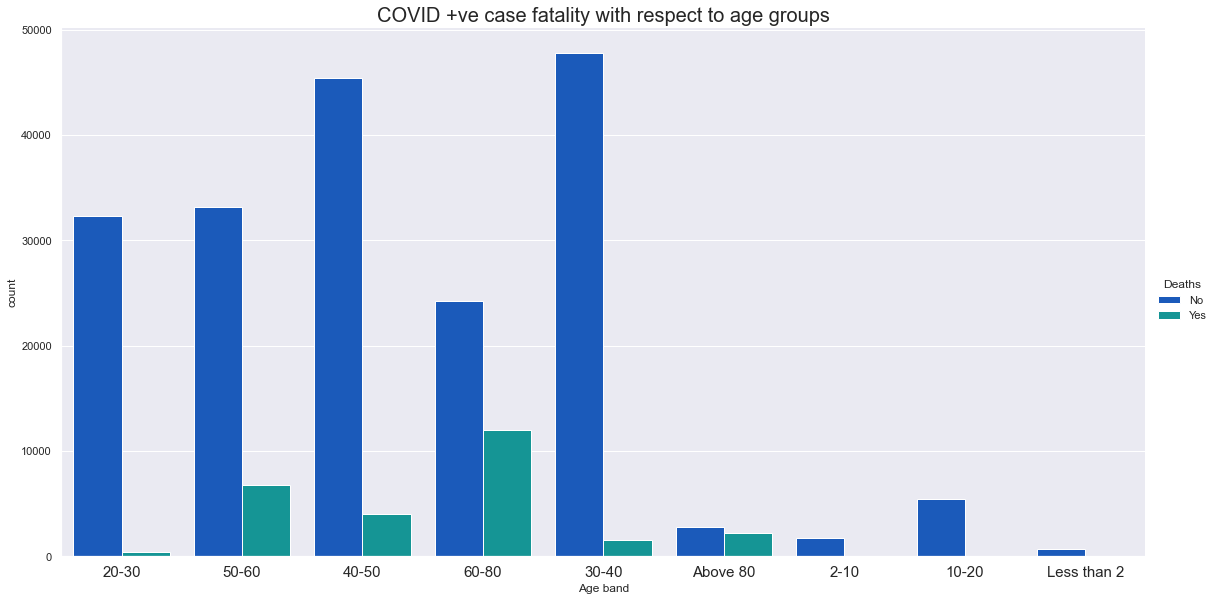

In [43]:
df_pos = df[df['covid_res']=='Positive']

sns.catplot('Age band',kind='count',hue='Deaths',data=df_pos,height=8,aspect=2,palette='winter')
plt.xticks(size=15)
plt.title('COVID +ve case fatality with respect to age groups',size=20)
plt.show()

__Conclusion: From the above plot, it can be seen that the case fatality is quite high for ages of 60-80 and above 80. This is expected since with body, the immune system becomes weaker and hence, it becomes tough for the body to fight a completely new virus. This is not just true for COVID but for most diseases.__

__We wanna make sure the about the age with +ve and deaths!__

In [44]:
# take sample form the positive df
age_sample = df_pos.sample(n=1000) 

In [45]:
age_sample.head(1)

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Deaths,Age band,Count
170918,Male,Outpatient,2020-06-16,2020-04-06,Not Specified,Not Specified,No,28,Not Specified,No,...,No,No,No,No,Not Specified,Positive,Not Specified,No,20-30,1


In [46]:
# if we take a random sample with size = 1000, ten thoundas time
age_tests = np.random.choice(age_sample['age'], size=(1000,10000))

In [47]:
# get the porpotions of each case(sample)
age_tests = age_tests.mean(axis=1)

In [48]:
age_tests[0]

46.6374

In [49]:
age_series = pd.Series(age_tests)

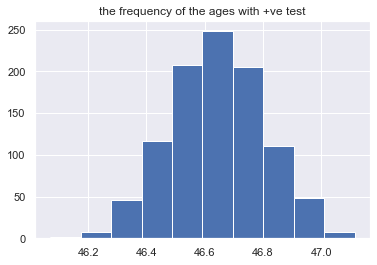

In [50]:
age_series.hist()
plt.title("the frequency of the ages with +ve test")
plt.show()

In [51]:
# we are 95 confident the mean of the age will be between this intervals
(round(np.percentile(age_tests, 2.5),2), round(np.percentile(age_tests, 97.5),2))

(46.34, 46.96)

__and, the deaths__

In [52]:
age_sample = df_pos[df_pos.Deaths == 'Yes'].sample(n=1000)

In [53]:
age_sample.head(1)

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Deaths,Age band,Count
158221,Male,Inpatient,2020-07-05,2020-02-05,14-05-2020,Yes,Yes,40,Not Specified,Yes,...,No,No,No,No,No,Positive,Yes,Yes,30-40,1


In [54]:
age_tests = np.random.choice(age_sample['age'], size=(1000,10000))

In [55]:
# get the porpotions of each case(sample)
age_tests = age_tests.mean(axis=1)

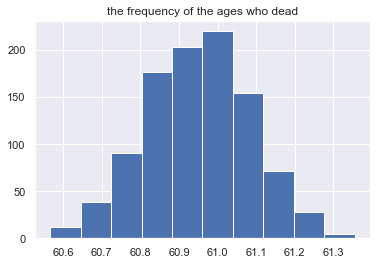

In [56]:
age_series = pd.Series(age_tests)

age_series.hist()
plt.title("the frequency of the ages who dead")
plt.show()

In [57]:
# we are 95 confident the mean of the age will be between this intervals
(round(np.percentile(age_tests, 2.5),2), round(np.percentile(age_tests, 97.5),2))

(60.68, 61.21)

__The ICUs, Clearly explained__

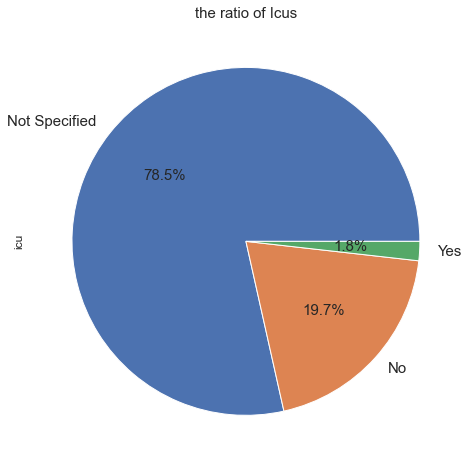

In [58]:
df.icu.value_counts().plot(kind='pie', autopct= '%1.1f%%',figsize = (10,8),fontsize=15)
plt.title("the ratio of Icus",fontsize=15)
plt.show()

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

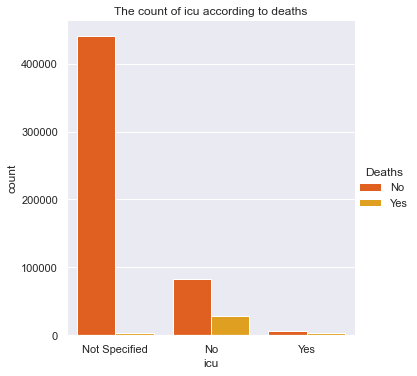

In [59]:
plt.figure(figsize=(10,8))
sns.catplot(x= 'icu', kind='count', data=df, hue='Deaths',ax=ax1,palette='autumn')
plt.title("The count of icu according to deaths")
plt.show()

__the big ratio of people who didn't put on ICU is died__

__why this happend ?__

In [60]:
icu_df = df[df.icu == 'No']
icu_df = icu_df[icu_df.Deaths == 'Yes']

In [61]:
icu_df.head(2)

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Deaths,Age band,Count
4,Female,Inpatient,2020-04-13,2020-04-13,22-04-2020,No,No,60,No,Yes,...,Yes,No,No,No,Not Specified,Positive,No,Yes,50-60,1
36,Male,Inpatient,2020-04-27,2020-04-27,28-04-2020,No,Yes,77,Not Specified,No,...,No,No,No,No,Not Specified,Positive,No,Yes,60-80,1


In [62]:
df_age_band = icu_df.groupby('Age band')['Count'].count().reset_index().sort_values(by='Count',ascending=False)

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


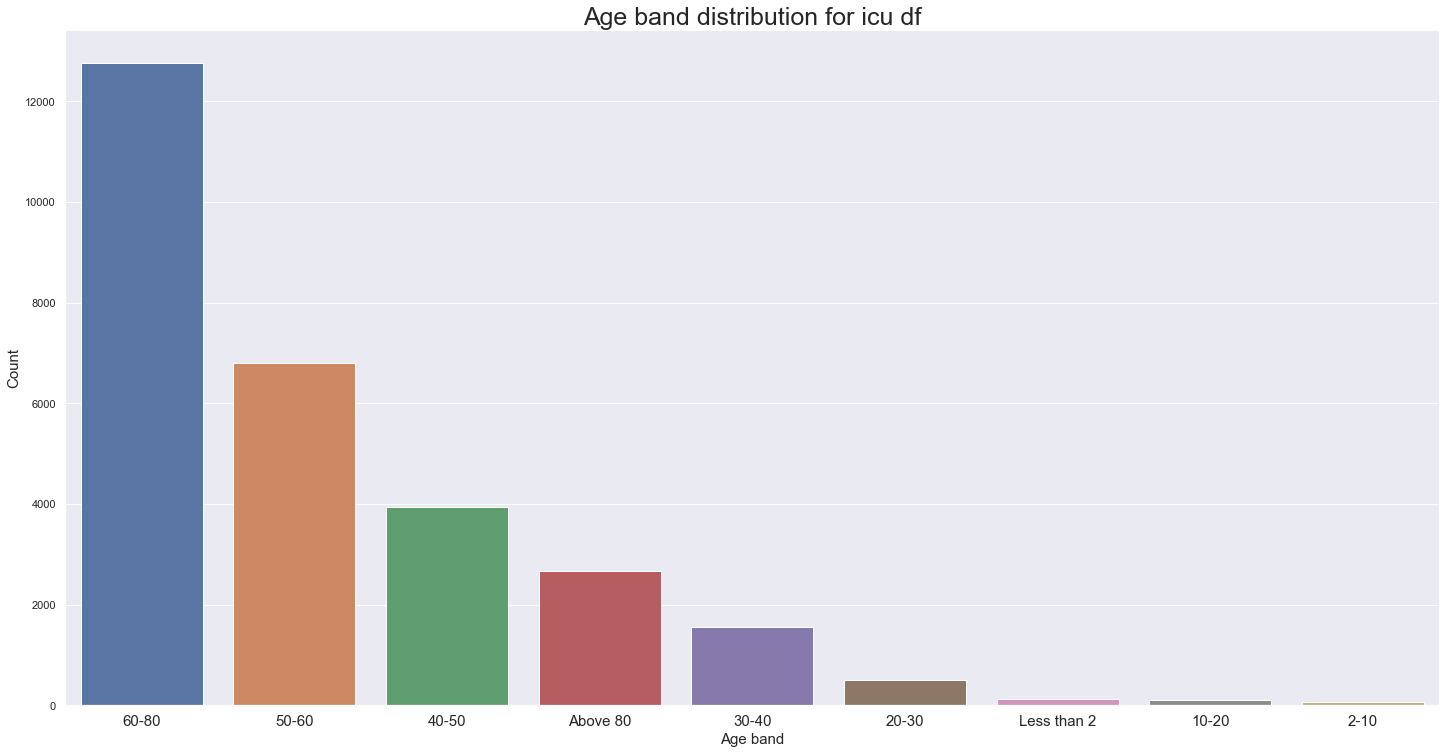

In [63]:
sns.catplot('Age band','Count', data=df_age_band,kind='bar',height=10,aspect=2)

plt.title('Age band distribution for icu df',size=25)
plt.xlabel('Age band',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=15)

plt.show()

In [64]:
diseases_coulmns = diseases_df.columns

In [65]:
def value_counts(columns,df):
    for column in columns:
        if column == 'sex':
            continue
        df[column].value_counts().plot(kind='pie', autopct= '%1.1f%%',figsize = (10,8),fontsize=12)
        plt.title(f"The ratio between vlaues for the {column} column",fontsize=15)
        plt.show()

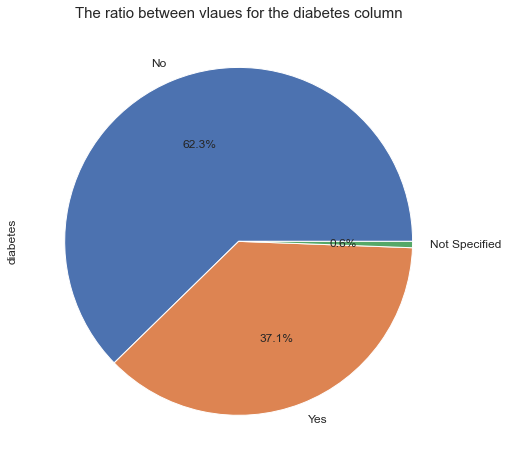

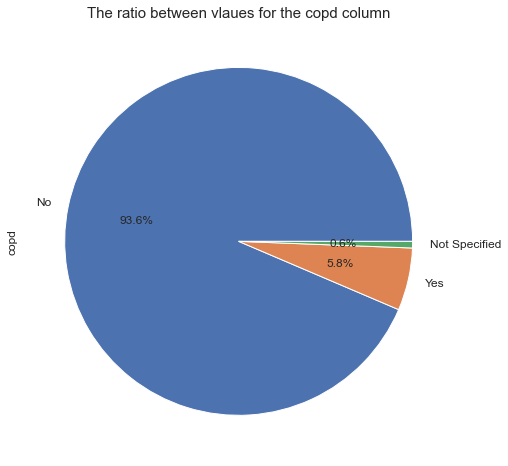

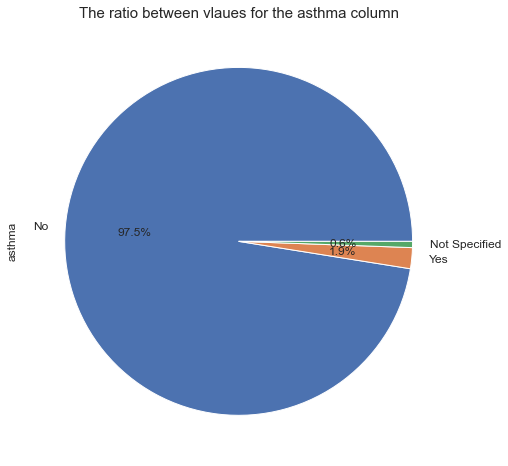

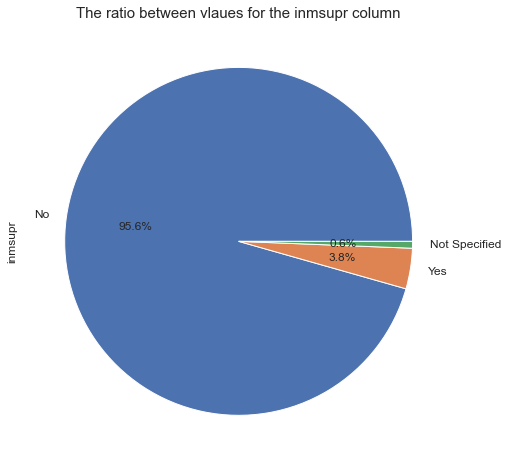

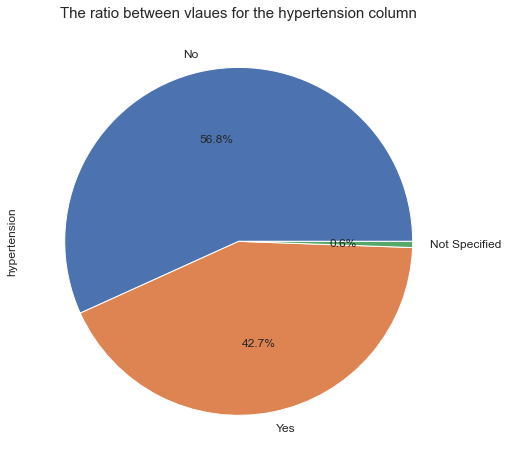

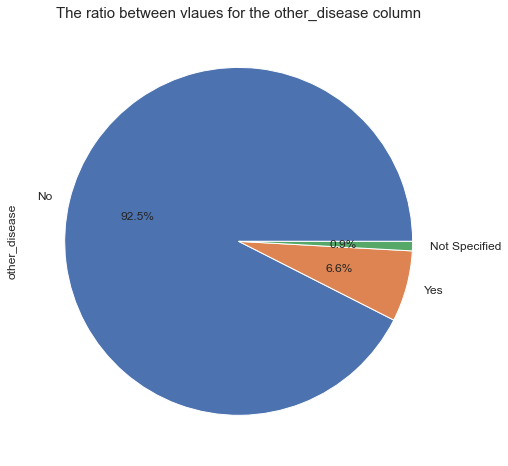

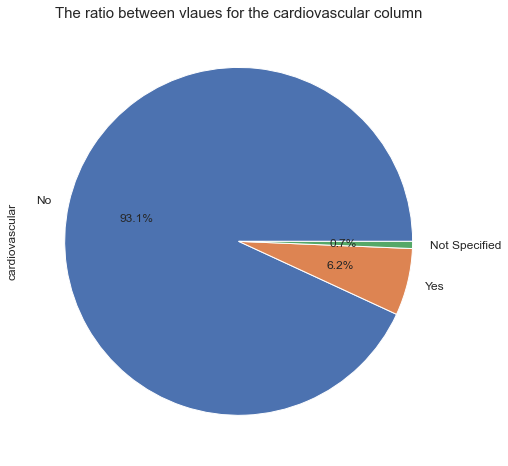

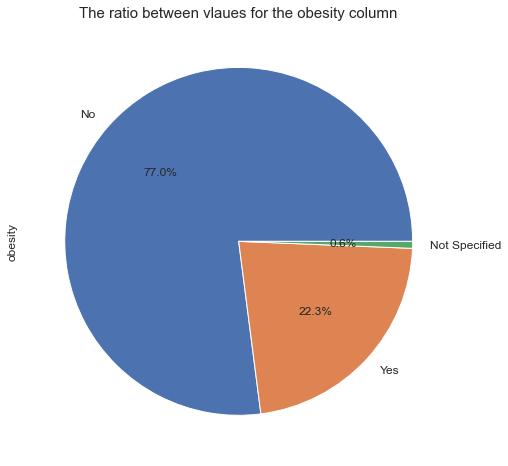

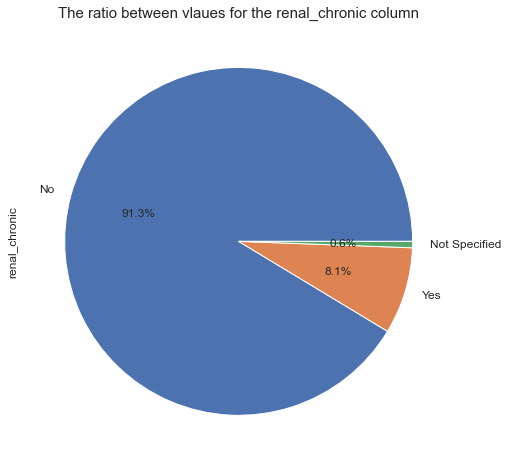

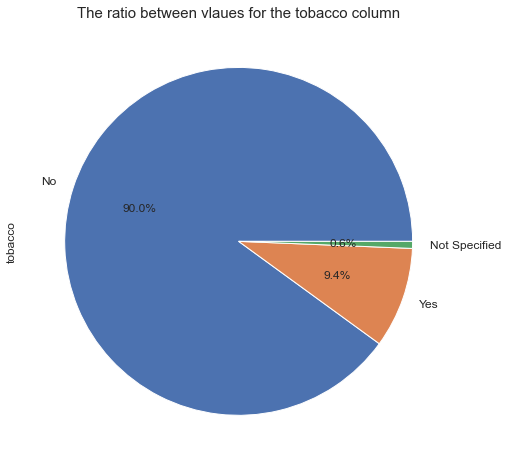

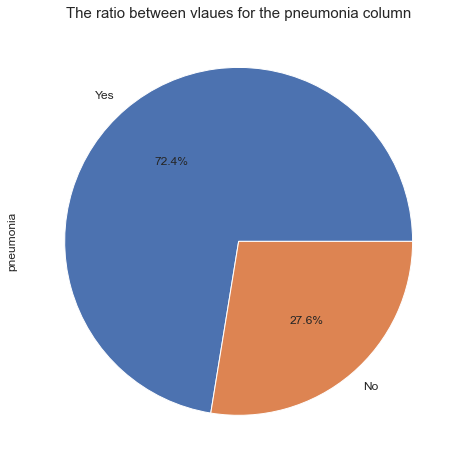

In [66]:
value_counts(diseases_coulmns,icu_df)

## Let's Crack our time

In [67]:
df.head(2)

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Deaths,Age band,Count
0,Male,Outpatient,2020-04-05,2020-02-05,Not Specified,Not Specified,No,27,Not Specified,No,...,No,No,No,No,No,Positive,Not Specified,No,20-30,1
1,Male,Outpatient,2020-03-19,2020-03-17,Not Specified,Not Specified,No,24,Not Specified,No,...,No,No,No,No,Not Specified,Positive,Not Specified,No,20-30,1


In [68]:
date_df = df.iloc[:, 2:5]

In [69]:
# the differnce between the 
date_df['entry_symptoms_diff'] = date_df.entry_date - date_df.date_symptoms

In [70]:
date_df.head(5)

,entry_date,date_symptoms,date_died,entry_symptoms_diff
0,2020-04-05,2020-02-05,Not Specified,60 days
1,2020-03-19,2020-03-17,Not Specified,2 days
2,2020-06-04,2020-01-04,Not Specified,152 days
3,2020-04-17,2020-10-04,Not Specified,-170 days
4,2020-04-13,2020-04-13,22-04-2020,0 days


In [71]:
# we got negative values: cause the data entry faliure
(date_df.entry_symptoms_diff < '0 day').sum()

101924

In [72]:
101924 / len(df)

0.17988641056685292

In [73]:
def fill_neg(neg):
    if str(neg) < '0 day':
        return 'Not Specified'
    else:
        return str(neg)

In [74]:
date_df['entry_symptoms_diff'] = date_df.entry_symptoms_diff.apply(fill_neg)

In [75]:
date_df.head()

,entry_date,date_symptoms,date_died,entry_symptoms_diff
0,2020-04-05,2020-02-05,Not Specified,60 days 00:00:00
1,2020-03-19,2020-03-17,Not Specified,2 days 00:00:00
2,2020-06-04,2020-01-04,Not Specified,152 days 00:00:00
3,2020-04-17,2020-10-04,Not Specified,Not Specified
4,2020-04-13,2020-04-13,22-04-2020,0 days 00:00:00


In [76]:
# let's aplly on the main data frame

In [341]:
df['entry_symptoms_diff']=abs(df['entry_date']-df['date_symptoms'])
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Deaths,Age band,Count,entry_symptoms_diff
0,Male,Outpatient,2020-04-05,2020-02-05,Not Specified,Not Specified,No,27,Not Specified,No,...,No,No,No,No,Positive,Not Specified,No,20-30,1,60 days
1,Male,Outpatient,2020-03-19,2020-03-17,Not Specified,Not Specified,No,24,Not Specified,No,...,No,No,No,Not Specified,Positive,Not Specified,No,20-30,1,2 days
2,Female,Inpatient,2020-06-04,2020-01-04,Not Specified,No,No,54,No,No,...,Yes,No,No,Not Specified,Positive,No,No,50-60,1,152 days
3,Male,Inpatient,2020-04-17,2020-10-04,Not Specified,No,Yes,30,Not Specified,No,...,No,No,No,Not Specified,Positive,No,No,20-30,1,170 days
4,Female,Inpatient,2020-04-13,2020-04-13,22-04-2020,No,No,60,No,Yes,...,No,No,No,Not Specified,Positive,No,Yes,50-60,1,0 days


In [342]:
df_pos=df[df['covid_res']=='Positive']
df_case_load=df.groupby('entry_date')['Count'].count().reset_index()
df_case_load.sort_values(by='entry_date',inplace=True)
df_case_load.head()

,entry_date,Count
0,2020-01-01,5
1,2020-01-02,8
2,2020-01-03,27
3,2020-01-04,1590
4,2020-01-05,3053


In [343]:
df_pos['entry_symptoms_diff'].value_counts()[0:8]

0 days    27240
3 days    16211
2 days    15380
4 days    13552
1 days    12374
5 days    10882
6 days     6734
7 days     6406
Name: entry_symptoms_diff, dtype: int64

In [345]:
df_delta=df_pos[df_pos['entry_symptoms_diff']<'8 days']

In [346]:
df_delta['Time gap']=df_delta['entry_symptoms_diff'].astype(str)

<ipython-input-346-01d2ee8a7e60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delta['Time gap']=df_delta['entry_symptoms_diff'].astype(str)


In [347]:
df_split=df_delta['Time gap'].str.rsplit('00',expand=True)
df_delta['Time gap']=df_split.iloc[:,0]

<ipython-input-347-95a9714fa412>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delta['Time gap']=df_split.iloc[:,0]


C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


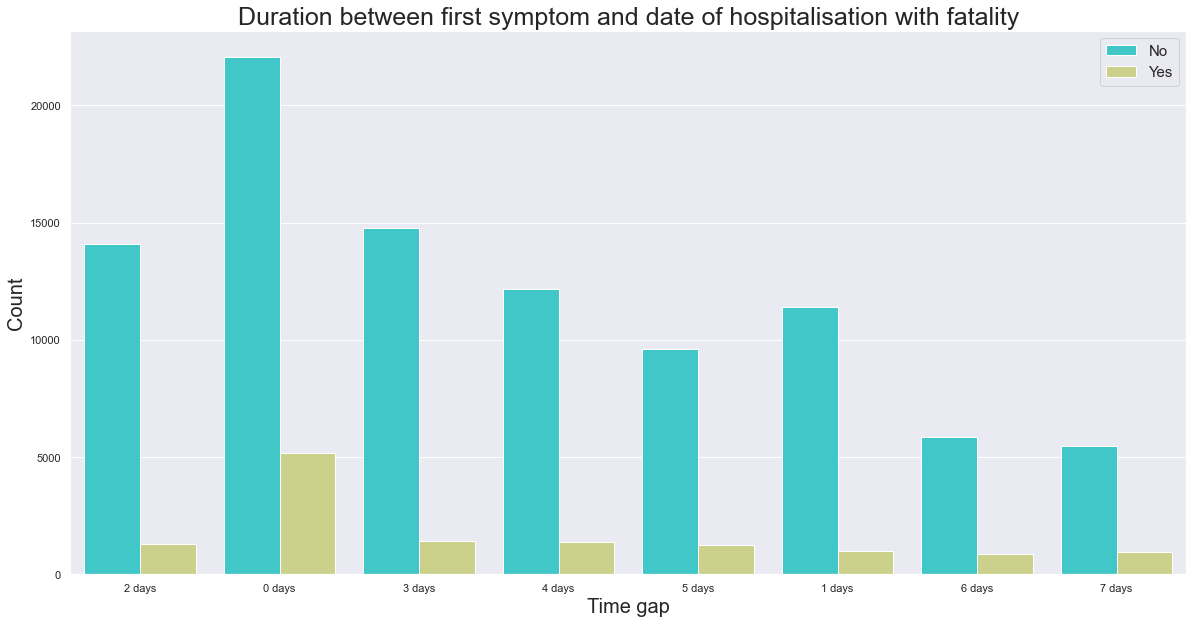

In [350]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(111)

g=sns.countplot('Time gap',hue='Deaths',data=df_delta,palette='rainbow',ax=ax1)
ax1.set_ylabel('Count',size=20)
ax1.set_xlabel('Time gap',size=20)
ax1.set_title('Duration between first symptom and date of hospitalisation with fatality',size=25)
ax1.legend(fontsize=15)

In [87]:
df_case_load.entry_date = pd.to_datetime(df_case_load.entry_date)

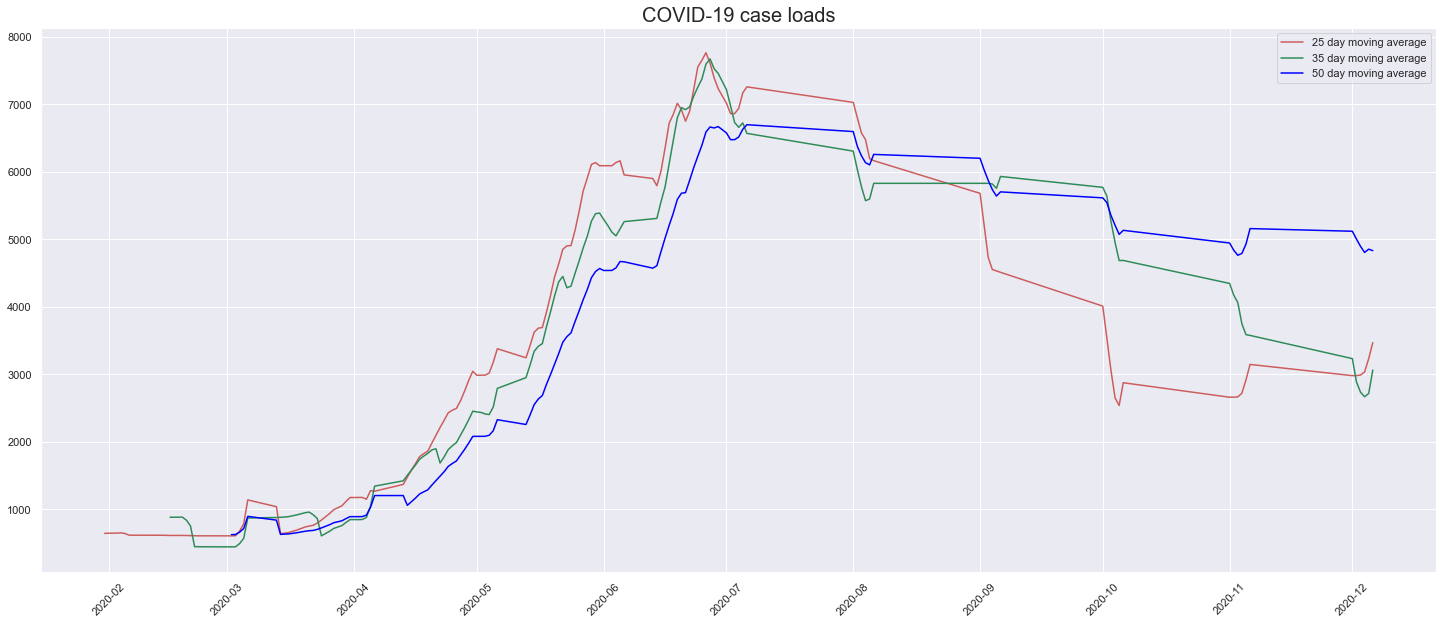

In [88]:
fig1=plt.figure(figsize=(25,10))
ax1=fig1.add_subplot(111)

df_case_load['Moving average_25']=df_case_load['Count'].rolling(25).mean()
df_case_load['Moving average_35']=df_case_load['Count'].rolling(35).mean()
df_case_load['Moving average_50']=df_case_load['Count'].rolling(50).mean()

ax1.plot(df_case_load['entry_date'],df_case_load['Moving average_25'],label='25 day moving average',color='indianred')
ax1.plot(df_case_load['entry_date'],df_case_load['Moving average_35'],label='35 day moving average',color='seagreen')
ax1.plot(df_case_load['entry_date'],df_case_load['Moving average_50'],label='50 day moving average',color='blue')

plt.legend()
plt.title('COVID-19 case loads',size=20)
plt.xticks(rotation=45)

plt.show()

__Conclusion: form the 05_2020: 07_2020 there are a booming in the data__

__What's happening right there?__

In [89]:
# df which got the most cases from 5th to 7th month
booming_df = df[df.entry_date >= '2020-05-01']

In [90]:
booming_df = booming_df[booming_df.entry_date <='2020-07-01']

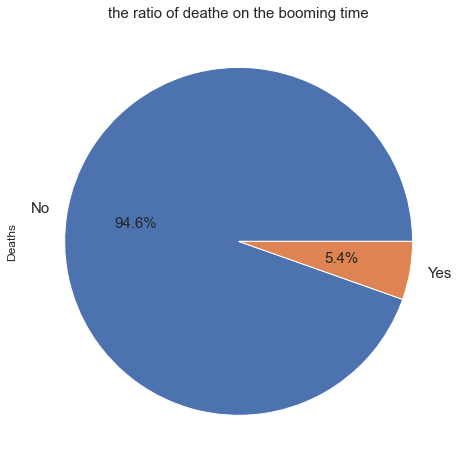

In [91]:
booming_df.Deaths.value_counts().plot(kind='pie',labels=['No','Yes'], autopct= '%1.1f%%',figsize = (10,8),fontsize=15)
plt.title("the ratio of deathe on the booming time",fontsize=15)
plt.show()

In [92]:
df_age_band = booming_df.groupby('Age band')['Count'].count().reset_index().sort_values(by='Count',ascending=False)

C:\Users\ahmed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


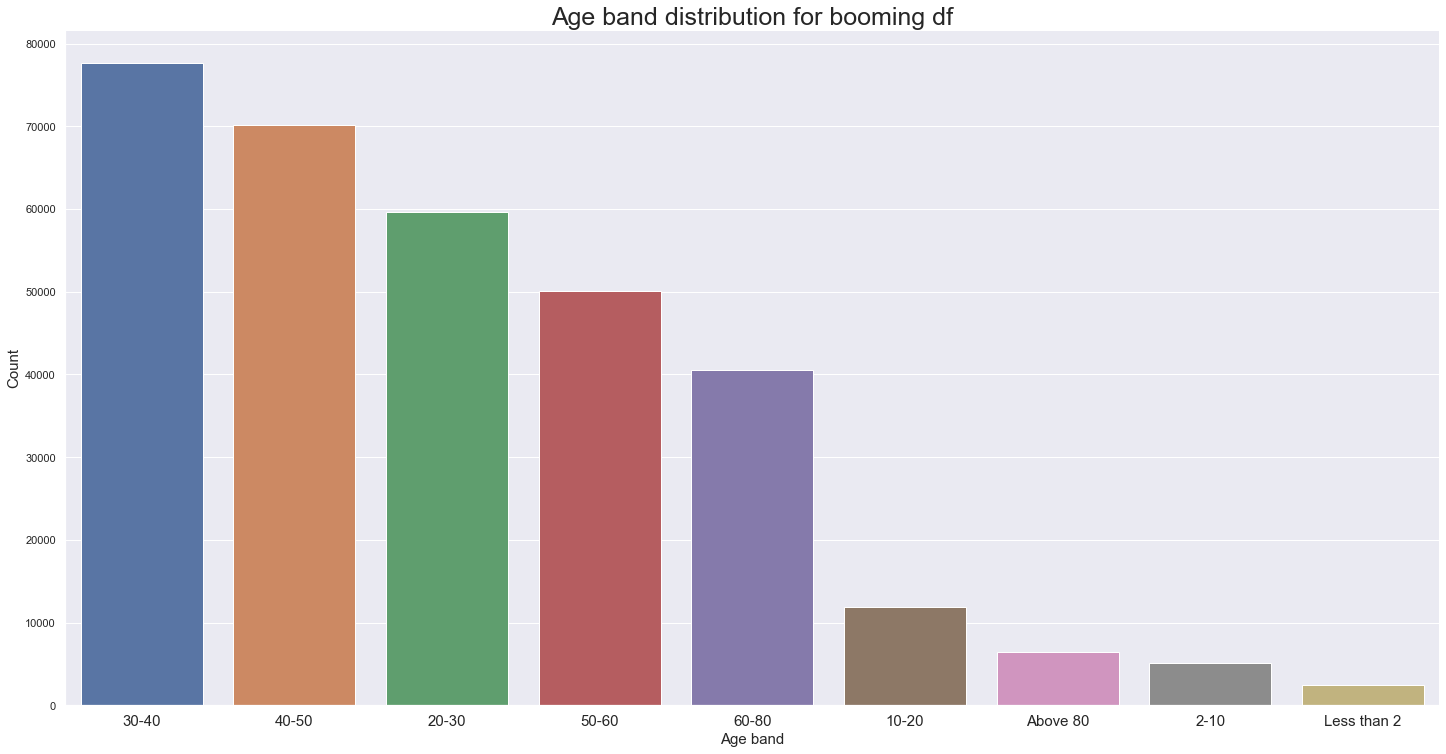

In [93]:
sns.catplot('Age band','Count', data=df_age_band,kind='bar',height=10,aspect=2)

plt.title('Age band distribution for booming df',size=25)
plt.xlabel('Age band',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=15)

plt.show()

In [94]:
def value_counts(columns,df):
    for column in columns:
        if column == 'sex':
            continue
        df[column].value_counts().plot(kind='pie', autopct= '%1.1f%%',figsize = (10,8),fontsize=12)
        plt.title(f"The ratio between vlaues for the {column} column",fontsize=15)
        plt.show()

__To see the affects of diseases_coulmns on this booming df__

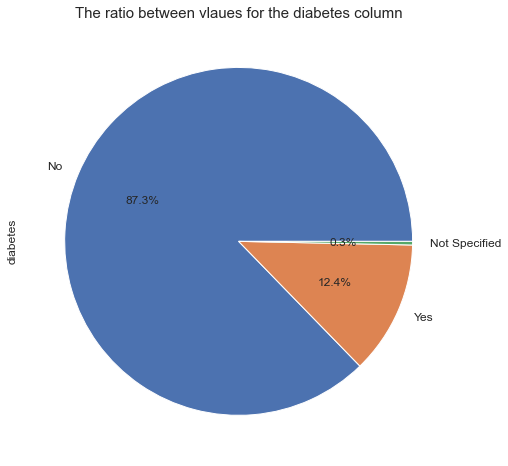

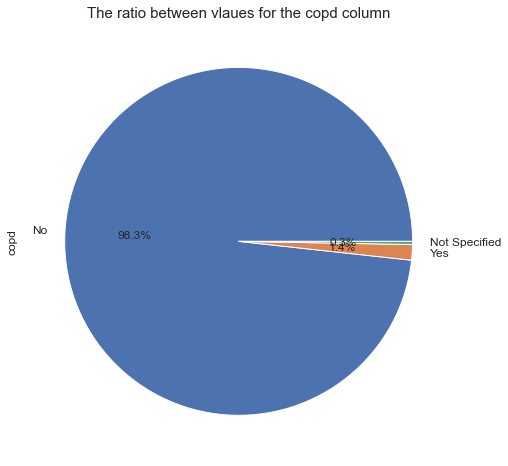

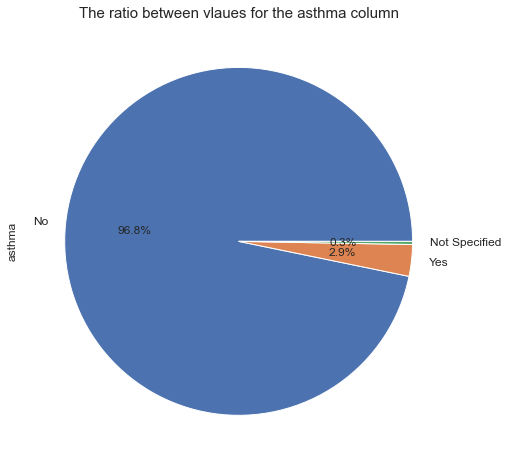

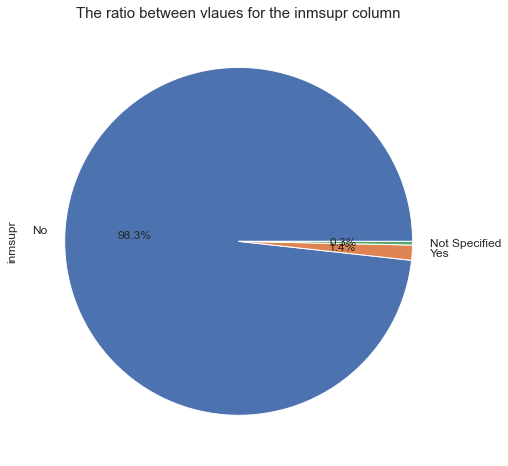

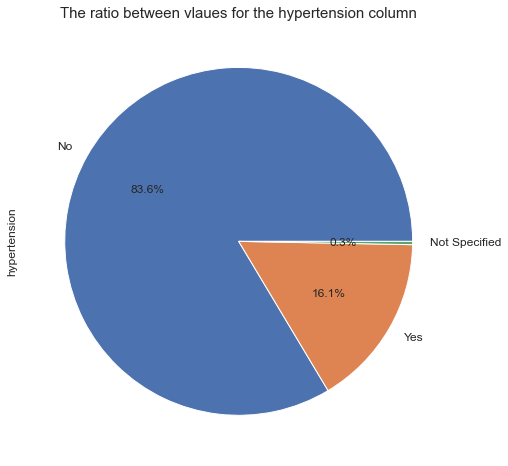

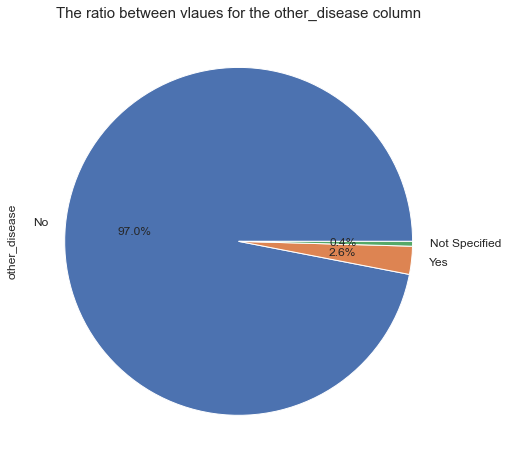

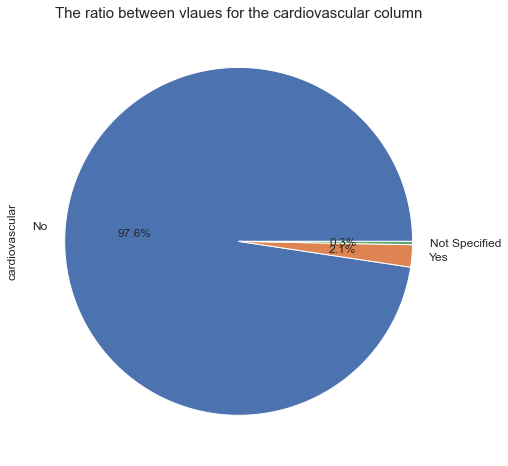

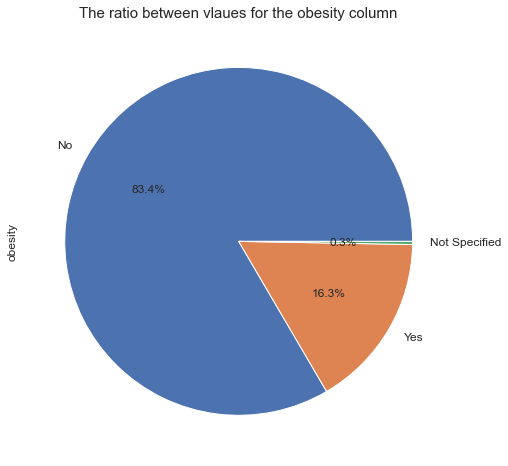

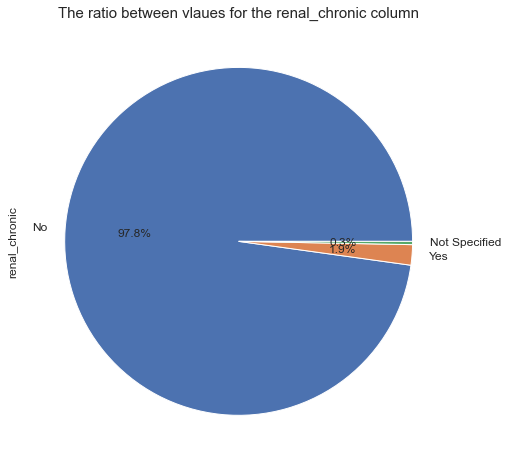

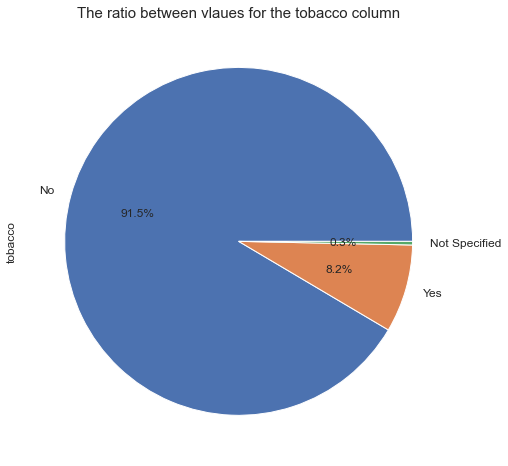

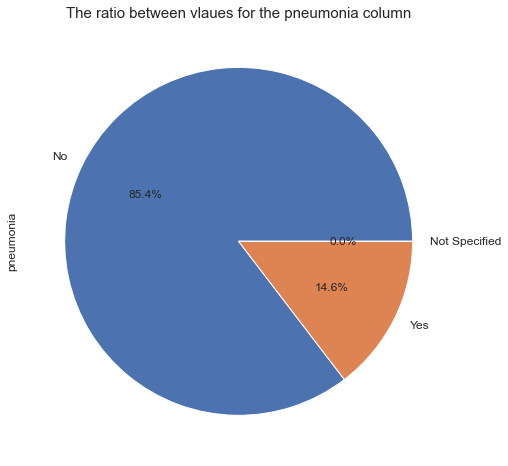

In [95]:
value_counts(diseases_coulmns,booming_df)

Using another global data to evaluate the Mexico medical system

__[The README File Link](https://github.com/owid/covid-19-data/tree/master/public/data)__

In [312]:
total_df = pd.read_csv("owid-covid-data.csv")

In [313]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113629 entries, 0 to 113628
Data columns (total 62 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               113629 non-null  object 
 1   continent                              108402 non-null  object 
 2   location                               113629 non-null  object 
 3   date                                   113629 non-null  object 
 4   total_cases                            108453 non-null  float64
 5   new_cases                              108450 non-null  float64
 6   new_cases_smoothed                     107435 non-null  float64
 7   total_deaths                           97885 non-null   float64
 8   new_deaths                             98039 non-null   float64
 9   new_deaths_smoothed                    107435 non-null  float64
 10  total_cases_per_million                107880 non-null  

In [322]:
total_df.fillna(method ='ffill',inplace=True)


In [323]:
# helpful to apply the models
eg_df = total_df[total_df.location == 'Egypt']

__Does the total cases is every thing?__

In [324]:
us_df = total_df[total_df.location == 'United States']

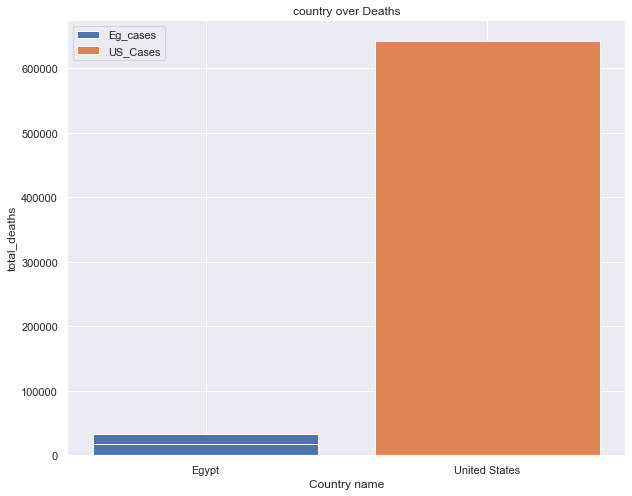

In [325]:
plt.figure(figsize=(10,8))
plt.bar(eg_df["location"],eg_df["total_deaths"],label="Eg_cases")
plt.bar(us_df["location"],us_df["total_deaths"],label="US_Cases")

plt.xlabel("Country name")
plt.ylabel("total_deaths")
plt.title("country over Deaths")

plt.legend()
plt.show()

__It's tricky__

In [326]:
# the death porpotions
total_df['death_porp'] = total_df.total_deaths / total_df.total_cases

In [327]:
eg_df = total_df[total_df.location == 'Egypt']
us_df = total_df[total_df.location == 'United States']

In [328]:
total_df.death_porp.dropna(inplace=True)

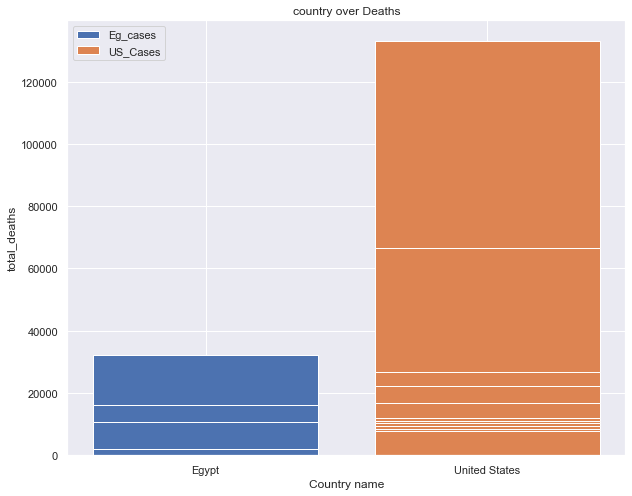

In [329]:
plt.figure(figsize=(10,8))
plt.bar(eg_df["location"],eg_df["death_porp"],label="Eg_cases")
plt.bar(us_df["location"],us_df["death_porp"],label="US_Cases")

plt.xlabel("Country name")
plt.ylabel("total_deaths")
plt.title("country over Deaths")

plt.legend()
plt.show()

# data preprocessing 

In [129]:
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Deaths,Age band,Count,entry_symptoms_diff
0,Male,Outpatient,2020-04-05,2020-02-05,Not Specified,Not Specified,No,27,Not Specified,No,...,No,No,No,No,Positive,Not Specified,No,20-30,1,60
1,Male,Outpatient,2020-03-19,2020-03-17,Not Specified,Not Specified,No,24,Not Specified,No,...,No,No,No,Not Specified,Positive,Not Specified,No,20-30,1,2
2,Female,Inpatient,2020-06-04,2020-01-04,Not Specified,No,No,54,No,No,...,Yes,No,No,Not Specified,Positive,No,No,50-60,1,152
3,Male,Inpatient,2020-04-17,2020-10-04,Not Specified,No,Yes,30,Not Specified,No,...,No,No,No,Not Specified,Positive,No,No,20-30,1,-170
4,Female,Inpatient,2020-04-13,2020-04-13,22-04-2020,No,No,60,No,Yes,...,No,No,No,Not Specified,Positive,No,Yes,50-60,1,0


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   sex                  566602 non-null  object        
 1   patient_type         566602 non-null  object        
 2   entry_date           566602 non-null  datetime64[ns]
 3   date_symptoms        566602 non-null  datetime64[ns]
 4   date_died            566602 non-null  object        
 5   intubed              566602 non-null  object        
 6   pneumonia            566602 non-null  object        
 7   age                  566602 non-null  int64         
 8   pregnancy            566602 non-null  object        
 9   diabetes             566602 non-null  object        
 10  copd                 566602 non-null  object        
 11  asthma               566602 non-null  object        
 12  inmsupr              566602 non-null  object        
 13  hypertension  

In [247]:
df.shape

(566602, 26)

In [248]:
df2=df.drop(columns={'date_symptoms','Age band','Count','entry_date','date_died','entry_symptoms_diff'},axis=1)

In [249]:
df2.shape

(566602, 20)

In [250]:
df2.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Deaths
0,Male,Outpatient,Not Specified,No,27,Not Specified,No,No,No,No,No,No,No,No,No,No,No,Positive,Not Specified,No
1,Male,Outpatient,Not Specified,No,24,Not Specified,No,No,No,No,No,No,No,No,No,No,Not Specified,Positive,Not Specified,No
2,Female,Inpatient,No,No,54,No,No,No,No,No,No,No,No,Yes,No,No,Not Specified,Positive,No,No
3,Male,Inpatient,No,Yes,30,Not Specified,No,No,No,No,No,No,No,No,No,No,Not Specified,Positive,No,No
4,Female,Inpatient,No,No,60,No,Yes,No,No,No,Yes,No,Yes,No,No,No,Not Specified,Positive,No,Yes


In [251]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   sex                  566602 non-null  object
 1   patient_type         566602 non-null  object
 2   intubed              566602 non-null  object
 3   pneumonia            566602 non-null  object
 4   age                  566602 non-null  int64 
 5   pregnancy            566602 non-null  object
 6   diabetes             566602 non-null  object
 7   copd                 566602 non-null  object
 8   asthma               566602 non-null  object
 9   inmsupr              566602 non-null  object
 10  hypertension         566602 non-null  object
 11  other_disease        566602 non-null  object
 12  cardiovascular       566602 non-null  object
 13  obesity              566602 non-null  object
 14  renal_chronic        566602 non-null  object
 15  tobacco              566602 non-nu

In [252]:
lst=df2.columns
for i in range(19):
    print(df2[lst[i]].value_counts().to_frame())
    print("----------------")

           sex
Male    287112
Female  279490
----------------
            patient_type
Outpatient        444689
Inpatient         121913
----------------
               intubed
Not Specified   444813
No              111824
Yes               9965
----------------
               pneumonia
No                478416
Yes                88175
Not Specified         11
----------------
       age
30   14604
31   13911
36   13890
38   13847
37   13836
..     ...
111      1
115      1
116      1
117      1
118      1

[120 rows x 1 columns]
----------------
               pregnancy
Not Specified     288699
No                273840
Yes                 4063
----------------
               diabetes
No               493790
Yes               70831
Not Specified      1981
----------------
                 copd
No             555723
Yes              9130
Not Specified    1749
----------------
               asthma
No             546824
Yes             18026
Not Specified    1752
----------------
       

In [253]:
from sklearn.preprocessing import LabelEncoder
object_data=df2.select_dtypes(include=['object'])
les={}
for cols in object_data.columns:
    les[cols]=LabelEncoder()
    df2[cols]= les[cols].fit_transform(df2[cols])

In [255]:
les['Deaths'].classes_

array(['No', 'Yes'], dtype=object)

In [139]:
df2.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Deaths
0,1,1,1,0,27,1,0,0,0,0,0,0,0,0,0,0,0,2,1,0
1,1,1,1,0,24,1,0,0,0,0,0,0,0,0,0,0,1,2,1,0
2,0,0,0,0,54,0,0,0,0,0,0,0,0,2,0,0,1,2,0,0
3,1,0,0,2,30,1,0,0,0,0,0,0,0,0,0,0,1,2,0,0
4,0,0,0,0,60,0,2,0,0,0,2,0,2,0,0,0,1,2,0,1


In [256]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   sex                  566602 non-null  int32
 1   patient_type         566602 non-null  int32
 2   intubed              566602 non-null  int32
 3   pneumonia            566602 non-null  int32
 4   age                  566602 non-null  int64
 5   pregnancy            566602 non-null  int32
 6   diabetes             566602 non-null  int32
 7   copd                 566602 non-null  int32
 8   asthma               566602 non-null  int32
 9   inmsupr              566602 non-null  int32
 10  hypertension         566602 non-null  int32
 11  other_disease        566602 non-null  int32
 12  cardiovascular       566602 non-null  int32
 13  obesity              566602 non-null  int32
 14  renal_chronic        566602 non-null  int32
 15  tobacco              566602 non-null  int32
 16  co

In [257]:
lst=df2.columns
for i in range(19):
    print(df2[lst[i]].value_counts().to_frame())
    print("----------------")

      sex
1  287112
0  279490
----------------
   patient_type
1        444689
0        121913
----------------
   intubed
1   444813
0   111824
2     9965
----------------
   pneumonia
0     478416
2      88175
1         11
----------------
       age
30   14604
31   13911
36   13890
38   13847
37   13836
..     ...
111      1
115      1
116      1
117      1
118      1

[120 rows x 1 columns]
----------------
   pregnancy
1     288699
0     273840
2       4063
----------------
   diabetes
0    493790
2     70831
1      1981
----------------
     copd
0  555723
2    9130
1    1749
----------------
   asthma
0  546824
2   18026
1    1752
----------------
   inmsupr
0   555644
2     8978
1     1980
----------------
   hypertension
0        472270
2         92508
1          1824
----------------
   other_disease
0         546920
2          17084
1           2598
----------------
   cardiovascular
0          552005
2           12775
1            1822
----------------
   obesity
0   472549

In [258]:
X = df2.drop(['Deaths'], axis=1)
y = df2['Deaths']

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state=42)

In [260]:
X_train.shape

(396621, 19)

In [261]:
X_test.shape

(169981, 19)

In [262]:
def reports():
    print("train Accuracy = {}".format(accuracy_score(y_train, train_model.predict(X_train))))
    print("test Accuracy = {}".format(accuracy_score(y_test, test_model)))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, test_model))
    print("Classification Report")
    print(classification_report(y_test, test_model))
    

# random forest

In [292]:
train_model = RandomForestClassifier(max_depth=20,max_features='sqrt',n_estimators=200,random_state=42)
train_model.fit(X_train, y_train)
test_model = train_model.predict(X_test)

In [293]:
reports()

train Accuracy = 0.9644068266682803
test Accuracy = 0.9410875333125467
Confusion Matrix
[[156297   2779]
 [  7235   3670]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    159076
           1       0.57      0.34      0.42     10905

    accuracy                           0.94    169981
   macro avg       0.76      0.66      0.70    169981
weighted avg       0.93      0.94      0.93    169981



## Naive Bayes Algorithm

In [294]:
from sklearn.naive_bayes import GaussianNB
train_model = GaussianNB()
train_model.fit(X_train, y_train)
test_model =train_model.predict(X_test)

In [295]:
reports()

train Accuracy = 0.8522392914142216
test Accuracy = 0.8511951335737523
Confusion Matrix
[[135609  23467]
 [  1827   9078]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.85      0.91    159076
           1       0.28      0.83      0.42     10905

    accuracy                           0.85    169981
   macro avg       0.63      0.84      0.67    169981
weighted avg       0.94      0.85      0.88    169981



## xgboost

In [351]:
from xgboost import XGBClassifier
train_model = XGBClassifier()
train_model.fit(X_train, y_train)
test_model =train_model.predict(X_test)

C:\Users\ahmed\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:04:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [352]:
reports()

train Accuracy = 0.9478872777790385
test Accuracy = 0.9443643701354857
Confusion Matrix
[[156775   2301]
 [  7156   3749]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    159076
           1       0.62      0.34      0.44     10905

    accuracy                           0.94    169981
   macro avg       0.79      0.66      0.71    169981
weighted avg       0.93      0.94      0.94    169981



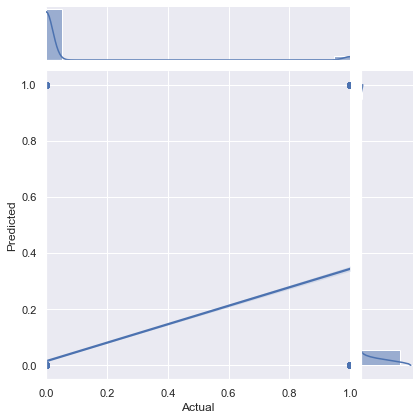

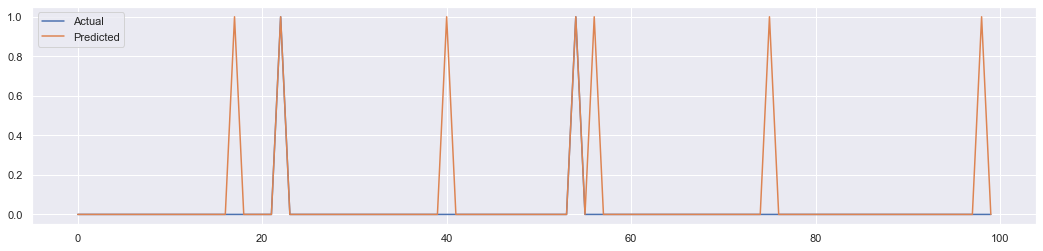

In [353]:
z=train_model.predict(X_test)

test = pd.DataFrame({'Predicted':z,'Actual':y_test})
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',)
fig= plt.figure(figsize=(18,4))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])

In [354]:
conf_mat=confusion_matrix(y_test,train_model.predict(X_test))
conf_mat

array([[156775,   2301],
       [  7156,   3749]], dtype=int64)

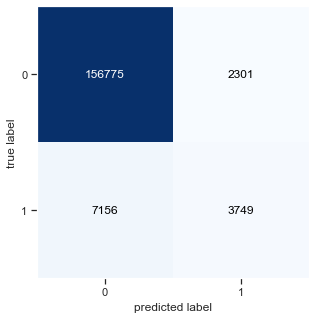

In [355]:
plot_confusion_matrix(conf_mat,figsize=(12,5));

## adaboosted tuned

In [298]:
from sklearn.ensemble import AdaBoostClassifier
train_model = AdaBoostClassifier(n_estimators= 200)
train_model.fit(X_train, y_train)
test_model =train_model.predict(X_test)

In [299]:
reports()

train Accuracy = 0.9428320739446474
test Accuracy = 0.9412993216888946
Confusion Matrix
[[155737   3339]
 [  6639   4266]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    159076
           1       0.56      0.39      0.46     10905

    accuracy                           0.94    169981
   macro avg       0.76      0.69      0.71    169981
weighted avg       0.93      0.94      0.94    169981



# Decision Tree Classifier

In [163]:
from sklearn.tree import DecisionTreeClassifier

In [300]:
train_model = DecisionTreeClassifier(max_depth=10,max_features=10,random_state=32)
train_model.fit(X_train, y_train)
test_model =train_model.predict(X_test)

In [301]:
reports()

train Accuracy = 0.9465459468863222
test Accuracy = 0.9441584647695919
Confusion Matrix
[[156802   2274]
 [  7218   3687]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    159076
           1       0.62      0.34      0.44     10905

    accuracy                           0.94    169981
   macro avg       0.79      0.66      0.70    169981
weighted avg       0.93      0.94      0.94    169981



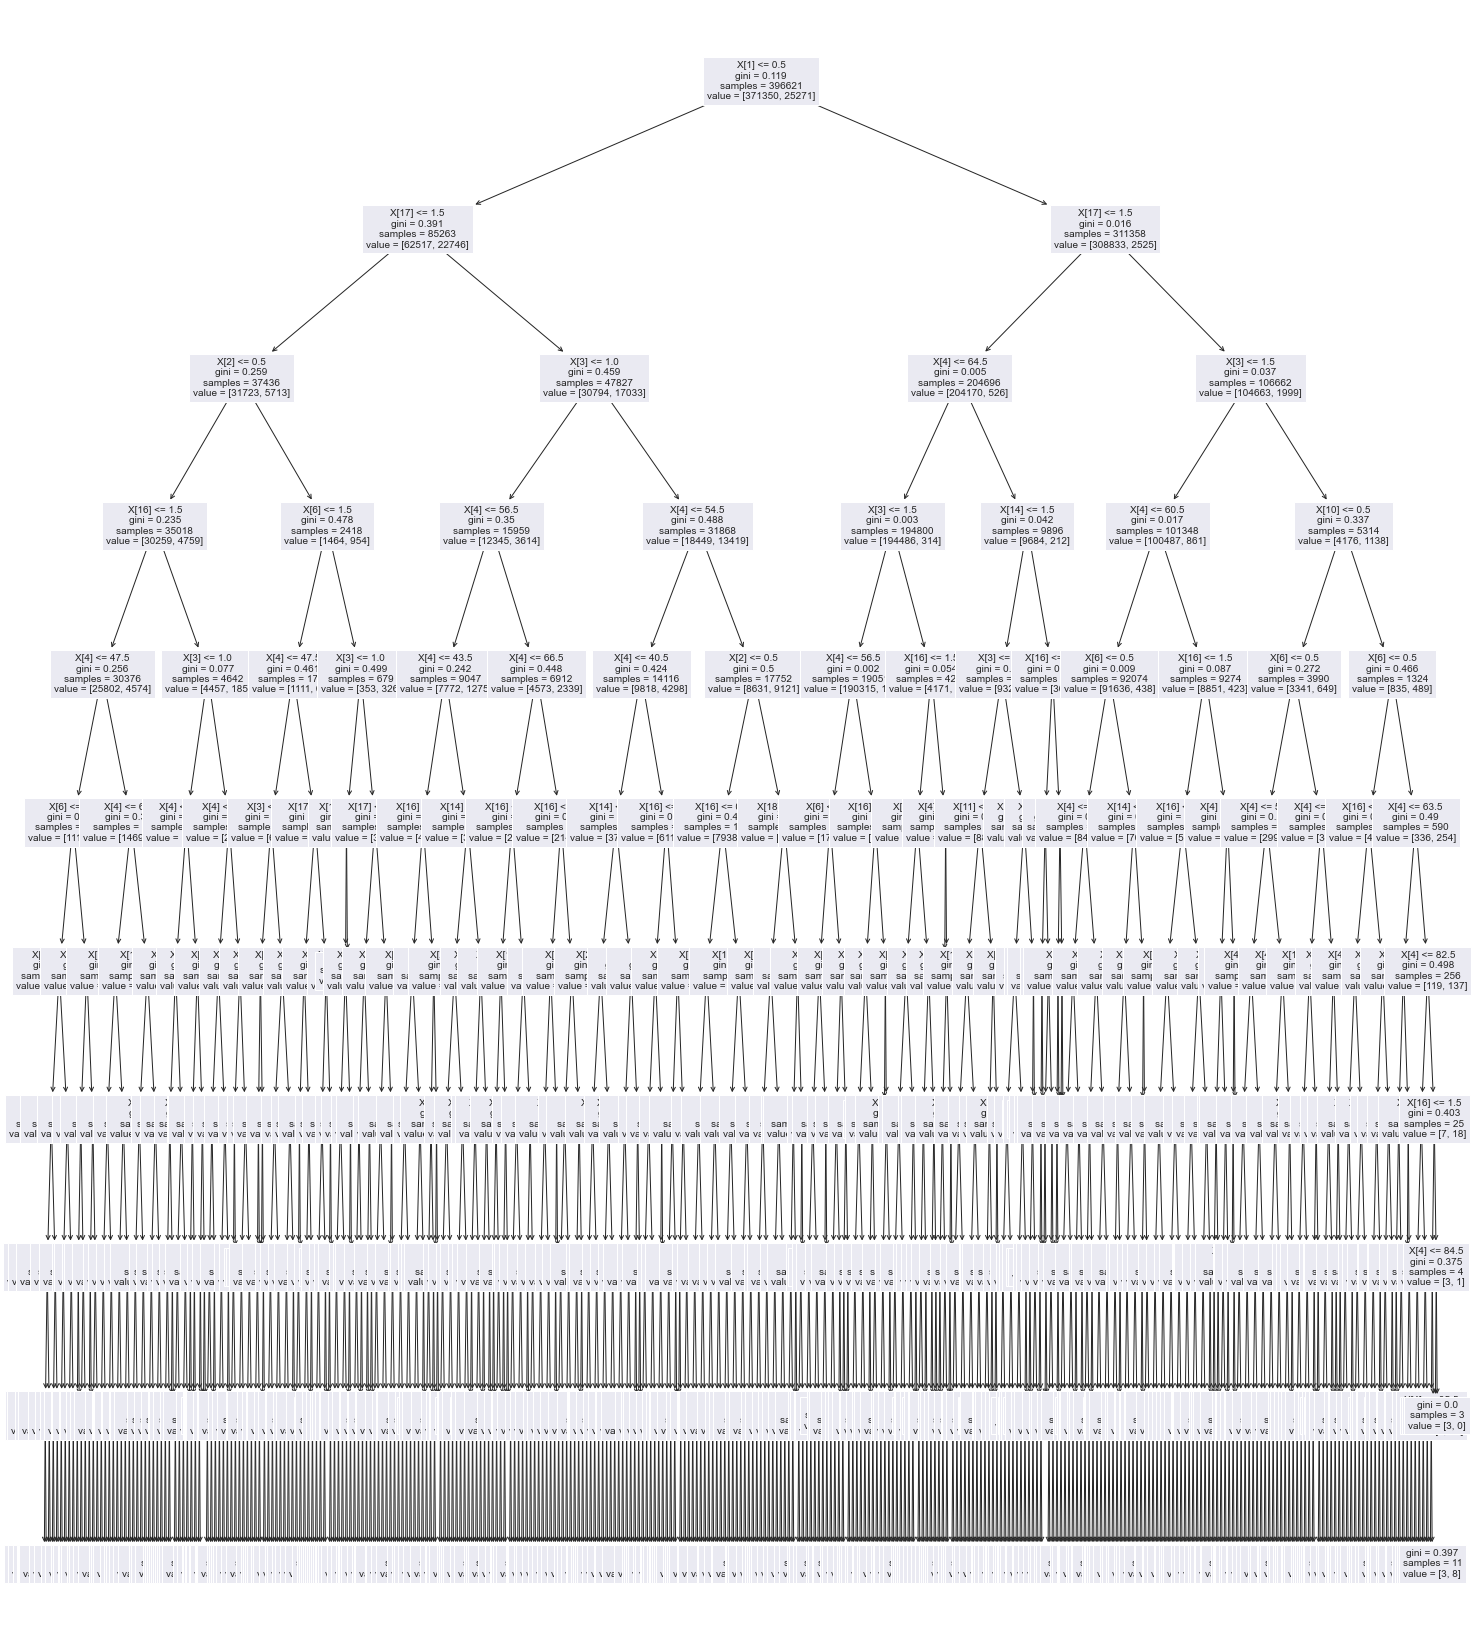

In [305]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(25, 30))
tree.plot_tree(train_model, fontsize=10)
plt.show()

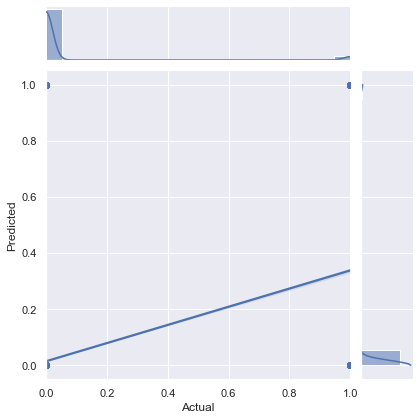

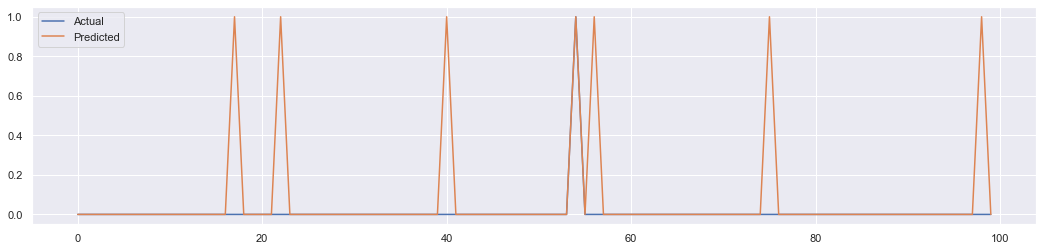

In [306]:
z=train_model.predict(X_test)

test = pd.DataFrame({'Predicted':z,'Actual':y_test})
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',)
fig= plt.figure(figsize=(18,4))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:100])
plt.legend(['Actual','Predicted'])


In [307]:
conf_mat=confusion_matrix(y_test,train_model.predict(X_test))
conf_mat

array([[156802,   2274],
       [  7218,   3687]], dtype=int64)

In [308]:
from mlxtend.plotting import plot_confusion_matrix

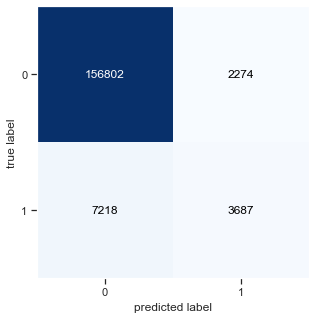

In [309]:
plot_confusion_matrix(conf_mat,figsize=(12,5)); #fn

## the highest accuracy model is "XGBOOST" and "decision tree"

# checking a random sample

In [310]:
new_patient=[1,1,1,1,0,53,1,1,1,1,0,1,0,0,1,0,1,0,1]

In [311]:
train_model.predict_proba([new_patient])

array([[1., 0.]])